<a href="https://colab.research.google.com/github/NarissaraYo/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

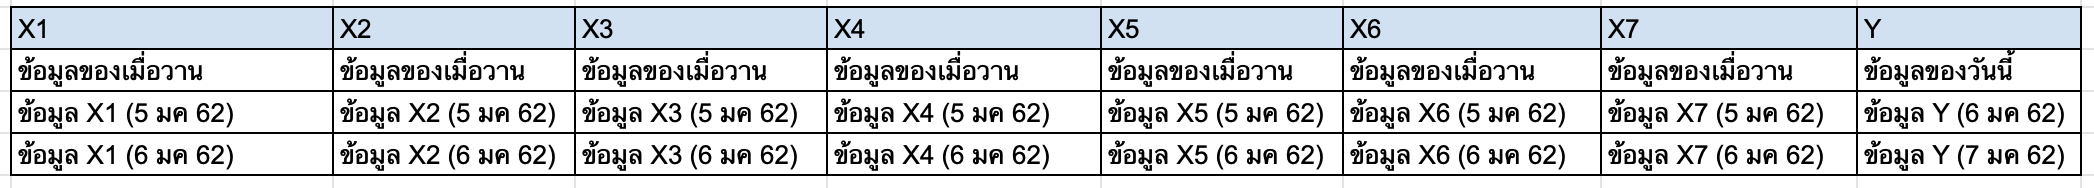

In [369]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [370]:
import pandas as pd

#นำเข้าข้อมูล

##นำเข้าข้อมูล จ.ขอนแก่น

In [371]:
 ps_khonkaen = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4) #ความกด_ขอนแก่น
 mt_khonkaen = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx',header=4) #ความชื้นสัมพันธ์_ขอนแก่น
 ws_khonkaen = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx',header=4) #ความเร็วลม_ขอนแก่น
 nc_khonkaen = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx',header=4) #จำนวนเมฆ_ขอนแก่น
 rf_khonkaen = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx',header=4) #ปริมาณน้ำฝน_ขอนแก่น
 td_khonkaen = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4) #อุณหภูมิจุดน้ำค้าง_ขอนแก่น
 tt_khonkaen = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4) #อุณหภมิตุ้มแห้ง_ขอนแก่น
 tl_khonkaen = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx',header=4) #อุณหภมิต่ำสุด_ขอนแก่น


In [372]:
 ws_khonkaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


##นำเข้าข้อมูล จ.นครพนม

In [373]:
 ps_nakornpanom = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4) #ความกด_นครพนม
 mt_nakornpanom = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx',header=4) #ความชื้นสัมพันธ์_นครพนม
 ws_nakornpanom = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx',header=4) #ความเร็วลม_นครพนม
 nc_nakornpanom = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx',header=4) #จำนวนเมฆ_นครพนม
 rf_nakornpanom = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx',header=4) #ปริมาณน้ำฝน_นครพนม
 td_nakornpanom = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx',header=4) #อุณหภูมิจุดน้ำค้าง_นครพนม
 tt_nakornpanom = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx',header=4) #อุณหภมิตุ้มแห้ง_นครพนม
 tl_nakornpanom = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx',header=4) #อุณหภมิต่ำสุด_นครพนม




##นำเข้าข้อมูล จ.สกลนคร

In [374]:
 ps_sakon = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4) #ความกด_สกล
 mt_sakon = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx',header=4) #ความชื้นสัมพันธ์_สกล
 ws_sakon = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx',header=4) #ความเร็วลม_สกล
 nc_sakon = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx',header=4) #จำนวนเมฆ_สกล
 rf_sakon = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx',header=4) #ปริมาณน้ำฝน_สกล
 td_sakon = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx',header=4) #อุณหภูมิจุดน้ำค้าง_สกล
 tt_sakon = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx',header=4) #อุณหภมิตุ้มแห้ง_สกล
 tl_sakon = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx',header=4) #อุณหภมิต่ำสุด_สกล

##นำเข้าข้อมูล จ.หนองคาย

In [375]:
 ps_nongkhai = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4) #ความกด_หนองคาย
 mt_nongkhai = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx',header=4) #ความชื้นสัมพันธ์_หนองคาย
 ws_nongkhai = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx',header=4) #ความเร็วลม_หนองคาย
 nc_nongkhai = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx',header=4) #จำนวนเมฆ_หนองคาย
 rf_nongkhai = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx',header=4) #ปริมาณน้ำฝน_หนองคาย
 td_nongkhai = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx',header=4) #อุณหภูมิจุดน้ำค้าง_หนองคาย
 tt_nongkhai = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx',header=4) #อุณหภมิตุ้มแห้ง_หนองคาย
 tl_nongkhai = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx',header=4) #อุณหภมิต่ำสุด_หนองคาย

##นำเข้าข้อมูล จ.เลย

In [376]:
 ps_loei = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4) #ความกด_เลย
 mt_loei = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx',header=4) #ความชื้นสัมพันธ์_เลย
 ws_loei = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx',header=4) #ความเร็วลม_เลย
 nc_loei = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx',header=4) #จำนวนเมฆ_เลย
 rf_loei = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx',header=4) #ปริมาณน้ำฝน_เลย
 td_loei = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx',header=4) #อุณหภูมิจุดน้ำค้าง_เลย
 tt_loei = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx',header=4) #อุณหภมิตุ้มแห้ง_เลย
 tl_loei = pd.read_excel('/content/drive/MyDrive/dsc_dpdm23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx',header=4) #อุณหภมิต่ำสุด_เลย

In [377]:
 ps_khonkaen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


#เปลี่ยนหัวคอลัมป์

##เปลี่ยนชื่อคอลัมป์ จ.ขอนแก่น

In [378]:
ps_khonkaen.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
mt_khonkaen.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
ws_khonkaen.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
nc_khonkaen.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
rf_khonkaen.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
td_khonkaen.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tt_khonkaen.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tl_khonkaen.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)

##เปลี่ยนชื่อคอลัมป์ จ.นครพนม

In [379]:
ps_nakornpanom.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
mt_nakornpanom.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
ws_nakornpanom.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
nc_nakornpanom.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
rf_nakornpanom.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
td_nakornpanom.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tt_nakornpanom.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tl_nakornpanom.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)

##เปลี่ยนชื่อคอลัมป์ จ.สกลนคร

In [380]:
ps_sakon.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
mt_sakon.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
ws_sakon.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
nc_sakon.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
rf_sakon.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
td_sakon.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tt_sakon.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tl_sakon.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)

##เปลี่ยนชื่อคอลัมป์ จ.หนองคาย

In [381]:
ps_nongkhai.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
mt_nongkhai.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
ws_nongkhai.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
nc_nongkhai.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
rf_nongkhai.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
td_nongkhai.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tt_nongkhai.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tl_nongkhai.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)

##เปลี่ยนชื่อคอลัมป์ จ.เลย

In [382]:
ps_loei.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
mt_loei.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
ws_loei.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
nc_loei.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
rf_loei.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
td_loei.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tt_loei.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)
tl_loei.rename(columns={'Unnamed: 0' : 'ที่','Unnamed: 1': 'สถานี','Unnamed: 2' : 'เดือน/ปี','Unnamed: 34' : 'เฉลี่ย'},inplace=True)

In [383]:
tl_loei

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.5,24.3,22.5,23.0,22.7,23.2,21.0,...,20.9,21.5,21.6,21.8,21.5,21.2,21.8,21,20.5,22.2
1,2,353201-เลย จ.เลย,2011-11-01,20.7,19.9,19.1,19.0,19.5,19.8,20.5,...,21.7,18.6,16.9,17.0,19.2,19.3,20.3,19.5,-,19.2
2,3,353201-เลย จ.เลย,2011-12-01,18,19.6,15.5,14.4,17.1,15.5,17.2,...,16.9,15.0,11.1,9.9,10.0,13,15.9,16.5,16.4,15.2
3,1,353201-เลย จ.เลย,2012-01-01,16,16.1,17.9,20.9,19.6,16.8,17.0,...,19.9,21.0,19.0,18.9,16.8,19,21,21.3,20.5,18.2
4,2,353201-เลย จ.เลย,2012-02-01,19,19.0,21.7,20.2,18.9,18.0,16.5,...,15.6,16.5,18.5,18.5,20.0,20.1,18.4,-,-,18.6
5,3,353201-เลย จ.เลย,2012-10-01,21.6,22.0,23.1,22.5,23.5,23.9,23.0,...,21.9,20.2,22.0,21.0,22.0,21.5,22,22.5,23.6,22.1
6,4,353201-เลย จ.เลย,2012-11-01,21,19.2,19.9,21.8,21.5,23.0,22.0,...,22.4,23.5,22.0,22.8,22.8,21.1,23,23.6,-,22.0
7,5,353201-เลย จ.เลย,2012-12-01,23,22.6,22.6,23.5,21.5,22.2,20.0,...,20.0,15.1,17.2,17.9,19.0,18.5,17.4,18.6,14.6,19.3
8,6,353201-เลย จ.เลย,2013-01-01,13,15.3,16.8,17.0,15.3,15.8,14.4,...,17.2,19.9,20.0,19.2,21.0,19.5,20.3,18.8,21.4,17.3
9,7,353201-เลย จ.เลย,2013-02-01,19,18.9,18.2,20.0,18.6,19.4,18.6,...,19.0,16.5,17.5,20.5,21.5,23,-,-,-,19.5


#นำมาต่อกันในแนวแกน x

##จ.ขอนแก่น

###ความกดอากาศ

> Indented block



In [384]:
ps_khonkaen['year'] = ps_khonkaen['เดือน/ปี'].dt.year
ps_khonkaen['month'] = ps_khonkaen['เดือน/ปี'].dt.month
ps_khonkaen = ps_khonkaen.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ps_khonkaen.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,352201-หนองคาย จ.หนองคาย,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,2011,10
1,2,352201-หนองคาย จ.หนองคาย,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,2011,11
2,3,352201-หนองคาย จ.หนองคาย,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,2011,12
3,1,352201-หนองคาย จ.หนองคาย,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,2012,1
4,2,352201-หนองคาย จ.หนองคาย,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,2012,2


In [385]:
ps_khonkaen_stack = ps_khonkaen.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ps_khonkaen_stack.rename(columns={'level_4' : 'day'},inplace=True)
ps_khonkaen_stack.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
ps_khonkaen_stack

,สถานี,ที่,year,month,day,ความกดอากาศ(%)
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88
...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98


In [386]:
import pandas as pd
import datetime

In [387]:
ps_khonkaen_stack['dateInt']=ps_khonkaen_stack['year'].astype(str) + ps_khonkaen_stack['month'].astype(str).str.zfill(2)+ ps_khonkaen_stack['day'].astype(str).str.zfill(2)
ps_khonkaen_stack['Date'] = pd.to_datetime(ps_khonkaen_stack['dateInt'], format='%Y%m%d',errors='coerce')


In [388]:
ps_khonkaen_stack

,สถานี,ที่,year,month,day,ความกดอากาศ(%),dateInt,Date
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47,20111001,2011-10-01
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65,20111002,2011-10-02
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49,20111003,2011-10-03
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28,20111004,2011-10-04
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88,20111005,2011-10-05
...,...,...,...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,2022,2,27,1014.37,20220227,2022-02-27
1701,352201-หนองคาย จ.หนองคาย,2,2022,2,28,1013.04,20220228,2022-02-28
1702,352201-หนองคาย จ.หนองคาย,2,2022,2,29,1013.37,20220229,NaT
1703,352201-หนองคาย จ.หนองคาย,2,2022,2,30,1013.98,20220230,NaT


In [389]:
ps_khonkaen_stack = ps_khonkaen_stack.drop(['dateInt'], axis =1)
ps_khonkaen_stack.head()

,สถานี,ที่,year,month,day,ความกดอากาศ(%),Date
0,352201-หนองคาย จ.หนองคาย,1,2011,10,1,1005.47,2011-10-01
1,352201-หนองคาย จ.หนองคาย,1,2011,10,2,1006.65,2011-10-02
2,352201-หนองคาย จ.หนองคาย,1,2011,10,3,1007.49,2011-10-03
3,352201-หนองคาย จ.หนองคาย,1,2011,10,4,1008.28,2011-10-04
4,352201-หนองคาย จ.หนองคาย,1,2011,10,5,1009.88,2011-10-05


In [390]:
ps_khonkaen_stack = ps_khonkaen_stack.drop(['year','month','day'], axis =1)
ps_khonkaen_stack.head()

,สถานี,ที่,ความกดอากาศ(%),Date
0,352201-หนองคาย จ.หนองคาย,1,1005.47,2011-10-01
1,352201-หนองคาย จ.หนองคาย,1,1006.65,2011-10-02
2,352201-หนองคาย จ.หนองคาย,1,1007.49,2011-10-03
3,352201-หนองคาย จ.หนองคาย,1,1008.28,2011-10-04
4,352201-หนองคาย จ.หนองคาย,1,1009.88,2011-10-05


In [391]:
ps_khonkaen_stack['province_id'] = len(ps_khonkaen_stack)*['kk']
ps_khonkaen_stack

,สถานี,ที่,ความกดอากาศ(%),Date,province_id
0,352201-หนองคาย จ.หนองคาย,1,1005.47,2011-10-01,kk
1,352201-หนองคาย จ.หนองคาย,1,1006.65,2011-10-02,kk
2,352201-หนองคาย จ.หนองคาย,1,1007.49,2011-10-03,kk
3,352201-หนองคาย จ.หนองคาย,1,1008.28,2011-10-04,kk
4,352201-หนองคาย จ.หนองคาย,1,1009.88,2011-10-05,kk
...,...,...,...,...,...
1700,352201-หนองคาย จ.หนองคาย,2,1014.37,2022-02-27,kk
1701,352201-หนองคาย จ.หนองคาย,2,1013.04,2022-02-28,kk
1702,352201-หนองคาย จ.หนองคาย,2,1013.37,NaT,kk
1703,352201-หนองคาย จ.หนองคาย,2,1013.98,NaT,kk


In [392]:
ps_khonkaen_re = ps_khonkaen_stack[['province_id','Date','ความกดอากาศ(%)']].reset_index()
ps_khonkaen_re = ps_khonkaen_re[['province_id','index','Date','ความกดอากาศ(%)']]
ps_khonkaen_re

,province_id,index,Date,ความกดอากาศ(%)
0,kk,0,2011-10-01,1005.47
1,kk,1,2011-10-02,1006.65
2,kk,2,2011-10-03,1007.49
3,kk,3,2011-10-04,1008.28
4,kk,4,2011-10-05,1009.88
...,...,...,...,...
1700,kk,1700,2022-02-27,1014.37
1701,kk,1701,2022-02-28,1013.04
1702,kk,1702,NaT,1013.37
1703,kk,1703,NaT,1013.98


In [393]:
ps_khonkaen_re["ที่"] = ps_khonkaen_re["province_id"].astype(str) + '_' + ps_khonkaen_re["index"].astype(str)

In [394]:
ps_khonkaen_fi = ps_khonkaen_re[['ที่','province_id','Date','ความกดอากาศ(%)']]
ps_khonkaen_fi

,ที่,province_id,Date,ความกดอากาศ(%)
0,kk_0,kk,2011-10-01,1005.47
1,kk_1,kk,2011-10-02,1006.65
2,kk_2,kk,2011-10-03,1007.49
3,kk_3,kk,2011-10-04,1008.28
4,kk_4,kk,2011-10-05,1009.88
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1014.37
1701,kk_1701,kk,2022-02-28,1013.04
1702,kk_1702,kk,NaT,1013.37
1703,kk_1703,kk,NaT,1013.98


###ความชื้นสัมพัทธ์

In [395]:
mt_khonkaen['year'] = mt_khonkaen['เดือน/ปี'].dt.year
mt_khonkaen['month'] = mt_khonkaen['เดือน/ปี'].dt.month
mt_khonkaen = mt_khonkaen.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
mt_khonkaen.head()

,ที่,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,381201-ขอนแก่น จ.ขอนแก่น,83,92,86,80,86,86,83,82,...,72,73,69,69,75,71,71,68,2011,10
1,2,381201-ขอนแก่น จ.ขอนแก่น,71,65,68,65,65,68,69,69,...,66,65,67,68,67,67,65,-,2011,11
2,3,381201-ขอนแก่น จ.ขอนแก่น,66,61,61,62,61,60,69,68,...,62,60,60,62,65,66,63,64,2011,12
3,1,381201-ขอนแก่น จ.ขอนแก่น,65,66,69,63,64,68,65,62,...,74,75,71,75,69,70,67,68,2012,1
4,2,381201-ขอนแก่น จ.ขอนแก่น,71,72,71,72,70,68,61,69,...,53,48,57,71,73,68,-,-,2012,2


In [396]:
mt_khonkaen_stack = mt_khonkaen.set_index(['สถานี','ที่','year','month']).stack().reset_index()
mt_khonkaen_stack.rename(columns={'level_4' : 'day'},inplace=True)
mt_khonkaen_stack.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
mt_khonkaen_stack

,สถานี,ที่,year,month,day,ความชื้นสัมพัทธ์(%)
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,83
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,92
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,86
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,80
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,86
...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,58
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,62
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-


In [397]:
mt_khonkaen_stack['dateInt']=mt_khonkaen_stack['year'].astype(str) + mt_khonkaen_stack['month'].astype(str).str.zfill(2)+ mt_khonkaen_stack['day'].astype(str).str.zfill(2)
mt_khonkaen_stack['Date'] = pd.to_datetime(mt_khonkaen_stack['dateInt'], format='%Y%m%d',errors='coerce')

In [398]:
mt_khonkaen_stack

,สถานี,ที่,year,month,day,ความชื้นสัมพัทธ์(%),dateInt,Date
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,83,20111001,2011-10-01
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,92,20111002,2011-10-02
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,86,20111003,2011-10-03
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,80,20111004,2011-10-04
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,86,20111005,2011-10-05
...,...,...,...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,27,58,20220227,2022-02-27
1701,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,28,62,20220228,2022-02-28
1702,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,29,-,20220229,NaT
1703,381201-ขอนแก่น จ.ขอนแก่น,2,2022,2,30,-,20220230,NaT


In [399]:
mt_khonkaen_stack = mt_khonkaen_stack.drop(['dateInt'], axis =1)
mt_khonkaen_stack.head()

,สถานี,ที่,year,month,day,ความชื้นสัมพัทธ์(%),Date
0,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,1,83,2011-10-01
1,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,2,92,2011-10-02
2,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,3,86,2011-10-03
3,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,4,80,2011-10-04
4,381201-ขอนแก่น จ.ขอนแก่น,1,2011,10,5,86,2011-10-05


In [400]:
mt_khonkaen_stack = mt_khonkaen_stack.drop(['year','month','day'], axis =1)
mt_khonkaen_stack.head()

,สถานี,ที่,ความชื้นสัมพัทธ์(%),Date
0,381201-ขอนแก่น จ.ขอนแก่น,1,83,2011-10-01
1,381201-ขอนแก่น จ.ขอนแก่น,1,92,2011-10-02
2,381201-ขอนแก่น จ.ขอนแก่น,1,86,2011-10-03
3,381201-ขอนแก่น จ.ขอนแก่น,1,80,2011-10-04
4,381201-ขอนแก่น จ.ขอนแก่น,1,86,2011-10-05


In [401]:
mt_khonkaen_stack['province_id'] = len(ps_khonkaen_stack)*['kk']
mt_khonkaen_stack

,สถานี,ที่,ความชื้นสัมพัทธ์(%),Date,province_id
0,381201-ขอนแก่น จ.ขอนแก่น,1,83,2011-10-01,kk
1,381201-ขอนแก่น จ.ขอนแก่น,1,92,2011-10-02,kk
2,381201-ขอนแก่น จ.ขอนแก่น,1,86,2011-10-03,kk
3,381201-ขอนแก่น จ.ขอนแก่น,1,80,2011-10-04,kk
4,381201-ขอนแก่น จ.ขอนแก่น,1,86,2011-10-05,kk
...,...,...,...,...,...
1700,381201-ขอนแก่น จ.ขอนแก่น,2,58,2022-02-27,kk
1701,381201-ขอนแก่น จ.ขอนแก่น,2,62,2022-02-28,kk
1702,381201-ขอนแก่น จ.ขอนแก่น,2,-,NaT,kk
1703,381201-ขอนแก่น จ.ขอนแก่น,2,-,NaT,kk


In [402]:
mt_khonkaen_re = mt_khonkaen_stack[['province_id','Date','ความชื้นสัมพัทธ์(%)']].reset_index()
mt_khonkaen_re = mt_khonkaen_re[['province_id','index','Date','ความชื้นสัมพัทธ์(%)']]
mt_khonkaen_re

,province_id,index,Date,ความชื้นสัมพัทธ์(%)
0,kk,0,2011-10-01,83
1,kk,1,2011-10-02,92
2,kk,2,2011-10-03,86
3,kk,3,2011-10-04,80
4,kk,4,2011-10-05,86
...,...,...,...,...
1700,kk,1700,2022-02-27,58
1701,kk,1701,2022-02-28,62
1702,kk,1702,NaT,-
1703,kk,1703,NaT,-


In [403]:
mt_khonkaen_re["ที่"] = mt_khonkaen_re["province_id"].astype(str) + '_' + mt_khonkaen_re["index"].astype(str)

In [404]:
mt_khonkaen_fi = mt_khonkaen_re[['ที่','province_id','Date','ความชื้นสัมพัทธ์(%)']]
mt_khonkaen_fi

,ที่,province_id,Date,ความชื้นสัมพัทธ์(%)
0,kk_0,kk,2011-10-01,83
1,kk_1,kk,2011-10-02,92
2,kk_2,kk,2011-10-03,86
3,kk_3,kk,2011-10-04,80
4,kk_4,kk,2011-10-05,86
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,58
1701,kk_1701,kk,2022-02-28,62
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###ความเร็วลม

In [405]:
ws_khonkaen['year'] = ws_khonkaen['เดือน/ปี'].dt.year
ws_khonkaen['month'] = ws_khonkaen['เดือน/ปี'].dt.month
ws_khonkaen = ws_khonkaen.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ws_khonkaen.head()


,ที่,สถานี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,year,month
0,1,353301-เลย สกษ. จ.เลย,3,2,3,2,2,3,4,3,...,3,5,5,5,4,6,4,5,2011,10
1,2,353301-เลย สกษ. จ.เลย,4,5,3,3,5,2,3,3,...,6,5,5,3,1,3,3,-,2011,11
2,3,353301-เลย สกษ. จ.เลย,3,4,4,4,4,4,4,4,...,6,7,6,5,4,4,6,5,2011,12
3,1,353301-เลย สกษ. จ.เลย,4,2,1,4,4,2,4,6,...,3,4,2,2,1,3,4,4,2012,1
4,2,353301-เลย สกษ. จ.เลย,2,2,3,2,3,1,2,3,...,2,3,2,4,3,3,3,-,2012,2


In [406]:
ws_khonkaen_stack = ws_khonkaen.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ws_khonkaen_stack.rename(columns={'level_4' : 'day'},inplace=True)
ws_khonkaen_stack.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_khonkaen_stack


,สถานี,ที่,year,month,day,ความเร็วลม(นอต)
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,3
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,2
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,3
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,2
...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,2
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,2
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-


In [407]:
ws_khonkaen_stack['dateInt']=ws_khonkaen_stack['year'].astype(str) + ws_khonkaen_stack['month'].astype(str).str.zfill(2)+ ws_khonkaen_stack['day'].astype(str).str.zfill(2)
ws_khonkaen_stack['Date'] = pd.to_datetime(ws_khonkaen_stack['dateInt'], format='%Y%m%d',errors='coerce')

In [408]:
ws_khonkaen_stack

,สถานี,ที่,year,month,day,ความเร็วลม(นอต),dateInt,Date
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,3,20111001,2011-10-01
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,2,20111002,2011-10-02
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,3,20111003,2011-10-03
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2,20111004,2011-10-04
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,2,20111005,2011-10-05
...,...,...,...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2022,2,27,2,20220227,2022-02-27
1701,353301-เลย สกษ. จ.เลย,2,2022,2,28,2,20220228,2022-02-28
1702,353301-เลย สกษ. จ.เลย,2,2022,2,29,-,20220229,NaT
1703,353301-เลย สกษ. จ.เลย,2,2022,2,30,-,20220230,NaT


In [409]:
ws_khonkaen_stack = ws_khonkaen_stack.drop(['dateInt'], axis =1)
ws_khonkaen_stack.head()


,สถานี,ที่,year,month,day,ความเร็วลม(นอต),Date
0,353301-เลย สกษ. จ.เลย,1,2011,10,1,3,2011-10-01
1,353301-เลย สกษ. จ.เลย,1,2011,10,2,2,2011-10-02
2,353301-เลย สกษ. จ.เลย,1,2011,10,3,3,2011-10-03
3,353301-เลย สกษ. จ.เลย,1,2011,10,4,2,2011-10-04
4,353301-เลย สกษ. จ.เลย,1,2011,10,5,2,2011-10-05


In [410]:
ws_khonkaen_stack = ws_khonkaen_stack.drop(['year','month','day'], axis =1)
ws_khonkaen_stack.head()


,สถานี,ที่,ความเร็วลม(นอต),Date
0,353301-เลย สกษ. จ.เลย,1,3,2011-10-01
1,353301-เลย สกษ. จ.เลย,1,2,2011-10-02
2,353301-เลย สกษ. จ.เลย,1,3,2011-10-03
3,353301-เลย สกษ. จ.เลย,1,2,2011-10-04
4,353301-เลย สกษ. จ.เลย,1,2,2011-10-05


In [411]:
ws_khonkaen_stack['province_id'] = len(ps_khonkaen_stack)*['kk']
ws_khonkaen_stack


,สถานี,ที่,ความเร็วลม(นอต),Date,province_id
0,353301-เลย สกษ. จ.เลย,1,3,2011-10-01,kk
1,353301-เลย สกษ. จ.เลย,1,2,2011-10-02,kk
2,353301-เลย สกษ. จ.เลย,1,3,2011-10-03,kk
3,353301-เลย สกษ. จ.เลย,1,2,2011-10-04,kk
4,353301-เลย สกษ. จ.เลย,1,2,2011-10-05,kk
...,...,...,...,...,...
1700,353301-เลย สกษ. จ.เลย,2,2,2022-02-27,kk
1701,353301-เลย สกษ. จ.เลย,2,2,2022-02-28,kk
1702,353301-เลย สกษ. จ.เลย,2,-,NaT,kk
1703,353301-เลย สกษ. จ.เลย,2,-,NaT,kk


In [412]:
ws_khonkaen_re = ws_khonkaen_stack[['province_id','Date','ความเร็วลม(นอต)']].reset_index()
ws_khonkaen_re = ws_khonkaen_re[['province_id','index','Date','ความเร็วลม(นอต)']]
ws_khonkaen_re


,province_id,index,Date,ความเร็วลม(นอต)
0,kk,0,2011-10-01,3
1,kk,1,2011-10-02,2
2,kk,2,2011-10-03,3
3,kk,3,2011-10-04,2
4,kk,4,2011-10-05,2
...,...,...,...,...
1700,kk,1700,2022-02-27,2
1701,kk,1701,2022-02-28,2
1702,kk,1702,NaT,-
1703,kk,1703,NaT,-


In [413]:
ws_khonkaen_re["ที่"] = ws_khonkaen_re["province_id"].astype(str) + '_' + ws_khonkaen_re["index"].astype(str)


In [414]:
ws_khonkaen_fi = ws_khonkaen_re[['ที่','province_id','Date','ความเร็วลม(นอต)']]
ws_khonkaen_fi


,ที่,province_id,Date,ความเร็วลม(นอต)
0,kk_0,kk,2011-10-01,3
1,kk_1,kk,2011-10-02,2
2,kk_2,kk,2011-10-03,3
3,kk_3,kk,2011-10-04,2
4,kk_4,kk,2011-10-05,2
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,2
1701,kk_1701,kk,2022-02-28,2
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###จำนวนเมฆ

In [415]:
nc_khonkaen['year'] = nc_khonkaen['เดือน/ปี'].dt.year
nc_khonkaen['month'] = nc_khonkaen['เดือน/ปี'].dt.month
nc_khonkaen = nc_khonkaen.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
nc_khonkaen.head()


nc_khonkaen_stack = nc_khonkaen.set_index(['สถานี','ที่','year','month']).stack().reset_index()
nc_khonkaen_stack.rename(columns={'level_4' : 'day'},inplace=True)
nc_khonkaen_stack.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
nc_khonkaen_stack


nc_khonkaen_stack['dateInt']=nc_khonkaen_stack['year'].astype(str) + nc_khonkaen_stack['month'].astype(str).str.zfill(2)+ nc_khonkaen_stack['day'].astype(str).str.zfill(2)
nc_khonkaen_stack['Date'] = pd.to_datetime(nc_khonkaen_stack['dateInt'], format='%Y%m%d',errors='coerce')


nc_khonkaen_stack = nc_khonkaen_stack.drop(['dateInt'], axis =1)
nc_khonkaen_stack.head()


nc_khonkaen_stack = nc_khonkaen_stack.drop(['year','month','day'], axis =1)
nc_khonkaen_stack.head()


nc_khonkaen_stack['province_id'] = len(ps_khonkaen_stack)*['kk']
nc_khonkaen_stack


nc_khonkaen_re = nc_khonkaen_stack[['province_id','Date','จำนวนเมฆ(10ส่วน)']].reset_index()
nc_khonkaen_re = nc_khonkaen_re[['province_id','index','Date','จำนวนเมฆ(10ส่วน)']]
nc_khonkaen_re


nc_khonkaen_re["ที่"] = nc_khonkaen_re["province_id"].astype(str) + '_' + nc_khonkaen_re["index"].astype(str)


nc_khonkaen_fi = nc_khonkaen_re[['ที่','province_id','Date','จำนวนเมฆ(10ส่วน)']]
nc_khonkaen_fi


,ที่,province_id,Date,จำนวนเมฆ(10ส่วน)
0,kk_0,kk,2011-10-01,9
1,kk_1,kk,2011-10-02,10
2,kk_2,kk,2011-10-03,10
3,kk_3,kk,2011-10-04,8
4,kk_4,kk,2011-10-05,10
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,2
1701,kk_1701,kk,2022-02-28,2
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###ปริมาณน้ำฝน

In [416]:
rf_khonkaen['year'] = rf_khonkaen['เดือน/ปี'].dt.year
rf_khonkaen['month'] = rf_khonkaen['เดือน/ปี'].dt.month
rf_khonkaen = rf_khonkaen.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
rf_khonkaen.head()

rf_khonkaen_stack = rf_khonkaen.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rf_khonkaen_stack.rename(columns={'level_4' : 'day'},inplace=True)
rf_khonkaen_stack.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
rf_khonkaen_stack


rf_khonkaen_stack['dateInt']=rf_khonkaen_stack['year'].astype(str) + rf_khonkaen_stack['month'].astype(str).str.zfill(2)+ rf_khonkaen_stack['day'].astype(str).str.zfill(2)
rf_khonkaen_stack['Date'] = pd.to_datetime(rf_khonkaen_stack['dateInt'], format='%Y%m%d',errors='coerce')


rf_khonkaen_stack = rf_khonkaen_stack.drop(['dateInt'], axis =1)
rf_khonkaen_stack.head()

rf_khonkaen_stack = rf_khonkaen_stack.drop(['year','month','day'], axis =1)
rf_khonkaen_stack.head()

rf_khonkaen_stack['province_id'] = len(ps_khonkaen_stack)*['kk']
rf_khonkaen_stack

rf_khonkaen_re = rf_khonkaen_stack[['province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rf_khonkaen_re = rf_khonkaen_re[['province_id','index','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_khonkaen_re

rf_khonkaen_re["ที่"] = rf_khonkaen_re["province_id"].astype(str) + '_' + rf_khonkaen_re["index"].astype(str)

rf_khonkaen_fi = rf_khonkaen_re[['ที่','province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_khonkaen_fi


,ที่,province_id,Date,ปริมาณน้ำฝน(มิลลิเมตร)
0,kk_0,kk,2011-10-01,1.4
1,kk_1,kk,2011-10-02,17.7
2,kk_2,kk,2011-10-03,3
3,kk_3,kk,2011-10-04,0
4,kk_4,kk,2011-10-05,2.2
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,0
1701,kk_1701,kk,2022-02-28,-
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิจุดน้ำค้าง

In [417]:
td_khonkaen['year'] = td_khonkaen['เดือน/ปี'].dt.year
td_khonkaen['month'] = td_khonkaen['เดือน/ปี'].dt.month
td_khonkaen = td_khonkaen.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
td_khonkaen.head()


td_khonkaen_stack = td_khonkaen.set_index(['สถานี','ที่','year','month']).stack().reset_index()
td_khonkaen_stack.rename(columns={'level_4' : 'day'},inplace=True)
td_khonkaen_stack.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
td_khonkaen_stack


td_khonkaen_stack['dateInt']=td_khonkaen_stack['year'].astype(str) + td_khonkaen_stack['month'].astype(str).str.zfill(2)+ td_khonkaen_stack['day'].astype(str).str.zfill(2)
td_khonkaen_stack['Date'] = pd.to_datetime(td_khonkaen_stack['dateInt'], format='%Y%m%d',errors='coerce')


td_khonkaen_stack = td_khonkaen_stack.drop(['dateInt'], axis =1)
td_khonkaen_stack.head()


td_khonkaen_stack = td_khonkaen_stack.drop(['year','month','day'], axis =1)
td_khonkaen_stack.head()


td_khonkaen_stack['province_id'] = len(ps_khonkaen_stack)*['kk']
td_khonkaen_stack


td_khonkaen_re = td_khonkaen_stack[['province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
td_khonkaen_re = td_khonkaen_re[['province_id','index','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_khonkaen_re


td_khonkaen_re["ที่"] = td_khonkaen_re["province_id"].astype(str) + '_' + td_khonkaen_re["index"].astype(str)


td_khonkaen_fi = td_khonkaen_re[['ที่','province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_khonkaen_fi


,ที่,province_id,Date,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,kk_0,kk,2011-10-01,24.2
1,kk_1,kk,2011-10-02,24.0
2,kk_2,kk,2011-10-03,22.9
3,kk_3,kk,2011-10-04,21.9
4,kk_4,kk,2011-10-05,21.7
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,15.7
1701,kk_1701,kk,2022-02-28,17.5
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิตุ้มแห้ง

In [418]:
tt_khonkaen['year'] = tt_khonkaen['เดือน/ปี'].dt.year
tt_khonkaen['month'] = tt_khonkaen['เดือน/ปี'].dt.month
tt_khonkaen = tt_khonkaen.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tt_khonkaen.head()


tt_khonkaen_stack = tt_khonkaen.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tt_khonkaen_stack.rename(columns={'level_4' : 'day'},inplace=True)
tt_khonkaen_stack.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
tt_khonkaen_stack


tt_khonkaen_stack['dateInt']=tt_khonkaen_stack['year'].astype(str) + tt_khonkaen_stack['month'].astype(str).str.zfill(2)+ tt_khonkaen_stack['day'].astype(str).str.zfill(2)
tt_khonkaen_stack['Date'] = pd.to_datetime(tt_khonkaen_stack['dateInt'], format='%Y%m%d',errors='coerce')


tt_khonkaen_stack = tt_khonkaen_stack.drop(['dateInt'], axis =1)
tt_khonkaen_stack.head()


tt_khonkaen_stack = tt_khonkaen_stack.drop(['year','month','day'], axis =1)
tt_khonkaen_stack.head()


tt_khonkaen_stack['province_id'] = len(ps_khonkaen_stack)*['kk']
tt_khonkaen_stack


tt_khonkaen_re = tt_khonkaen_stack[['province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
tt_khonkaen_re = tt_khonkaen_re[['province_id','index','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_khonkaen_re


tt_khonkaen_re["ที่"] = tt_khonkaen_re["province_id"].astype(str) + '_' + tt_khonkaen_re["index"].astype(str)


tt_khonkaen_fi = tt_khonkaen_re[['ที่','province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_khonkaen_fi


,ที่,province_id,Date,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,kk_0,kk,2011-10-01,27.6
1,kk_1,kk,2011-10-02,25.6
2,kk_2,kk,2011-10-03,25.6
3,kk_3,kk,2011-10-04,25.8
4,kk_4,kk,2011-10-05,24.3
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,25.1
1701,kk_1701,kk,2022-02-28,25.9
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิต่ำสุด

In [419]:
tl_khonkaen['year'] = tl_khonkaen['เดือน/ปี'].dt.year
tl_khonkaen['month'] = tl_khonkaen['เดือน/ปี'].dt.month
tl_khonkaen = tl_khonkaen.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tl_khonkaen.head()


tl_khonkaen_stack = tl_khonkaen.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tl_khonkaen_stack.rename(columns={'level_4' : 'day'},inplace=True)
tl_khonkaen_stack.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
tl_khonkaen_stack


tl_khonkaen_stack['dateInt']=tl_khonkaen_stack['year'].astype(str) + tl_khonkaen_stack['month'].astype(str).str.zfill(2)+ tl_khonkaen_stack['day'].astype(str).str.zfill(2)
tl_khonkaen_stack['Date'] = pd.to_datetime(tl_khonkaen_stack['dateInt'], format='%Y%m%d',errors='coerce')


tl_khonkaen_stack = tl_khonkaen_stack.drop(['dateInt'], axis =1)
tl_khonkaen_stack.head()


tl_khonkaen_stack = tl_khonkaen_stack.drop(['year','month','day'], axis =1)
tl_khonkaen_stack.head()


tl_khonkaen_stack['province_id'] = len(ps_khonkaen_stack)*['kk']
tl_khonkaen_stack


tl_khonkaen_re = tl_khonkaen_stack[['province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
tl_khonkaen_re = tl_khonkaen_re[['province_id','index','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_khonkaen_re


tl_khonkaen_re["ที่"] = tl_khonkaen_re["province_id"].astype(str) + '_' + tl_khonkaen_re["index"].astype(str)


tl_khonkaen_fi = tl_khonkaen_re[['ที่','province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_khonkaen_fi


,ที่,province_id,Date,อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,24.8
1,kk_1,kk,2011-10-02,23.0
2,kk_2,kk,2011-10-03,22.1
3,kk_3,kk,2011-10-04,22.8
4,kk_4,kk,2011-10-05,23.1
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,18.2
1701,kk_1701,kk,2022-02-28,-
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


##จ.นครพนม

###ความกดอากาศ

In [420]:
ps_nakornpanom['year'] = ps_nakornpanom['เดือน/ปี'].dt.year
ps_nakornpanom['month'] = ps_nakornpanom['เดือน/ปี'].dt.month
ps_nakornpanom = ps_nakornpanom.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ps_nakornpanom.head()


ps_nakornpanom_stack = ps_nakornpanom.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ps_nakornpanom_stack.rename(columns={'level_4' : 'day'},inplace=True)
ps_nakornpanom_stack.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
ps_nakornpanom_stack


ps_nakornpanom_stack['dateInt']=ps_nakornpanom_stack['year'].astype(str) + ps_nakornpanom_stack['month'].astype(str).str.zfill(2)+ ps_nakornpanom_stack['day'].astype(str).str.zfill(2)
ps_nakornpanom_stack['Date'] = pd.to_datetime(ps_nakornpanom_stack['dateInt'], format='%Y%m%d',errors='coerce')


ps_nakornpanom_stack = ps_nakornpanom_stack.drop(['dateInt'], axis =1)
ps_nakornpanom_stack.head()


ps_nakornpanom_stack = ps_nakornpanom_stack.drop(['year','month','day'], axis =1)
ps_nakornpanom_stack.head()


ps_nakornpanom_stack['province_id'] = len(ps_nakornpanom_stack)*['kk']
ps_nakornpanom_stack


ps_nakornpanom_re = ps_nakornpanom_stack[['province_id','Date','ความกดอากาศ(%)']].reset_index()
ps_nakornpanom_re = ps_nakornpanom_re[['province_id','index','Date','ความกดอากาศ(%)']]
ps_nakornpanom_re


ps_nakornpanom_re["ที่"] = ps_nakornpanom_re["province_id"].astype(str) + '_' + ps_nakornpanom_re["index"].astype(str)


ps_nakornpanom_fi = ps_nakornpanom_re[['ที่','province_id','Date','ความกดอากาศ(%)']]
ps_nakornpanom_fi


,ที่,province_id,Date,ความกดอากาศ(%)
0,kk_0,kk,2011-10-01,1006.3
1,kk_1,kk,2011-10-02,1007.38
2,kk_2,kk,2011-10-03,1008.07
3,kk_3,kk,2011-10-04,1008.44
4,kk_4,kk,2011-10-05,1010.51
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1016.43
1701,kk_1701,kk,2022-02-28,1013.53
1702,kk_1702,kk,NaT,1013.37
1703,kk_1703,kk,NaT,1013.98


###ความชื้นสัมพัทธ์

In [421]:
mt_nakornpanom['year'] = mt_nakornpanom['เดือน/ปี'].dt.year
mt_nakornpanom['month'] = mt_nakornpanom['เดือน/ปี'].dt.month
mt_nakornpanom = mt_nakornpanom.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
mt_nakornpanom.head()


mt_nakornpanom_stack = mt_nakornpanom.set_index(['สถานี','ที่','year','month']).stack().reset_index()
mt_nakornpanom_stack.rename(columns={'level_4' : 'day'},inplace=True)
mt_nakornpanom_stack.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
mt_nakornpanom_stack


mt_nakornpanom_stack['dateInt']=mt_nakornpanom_stack['year'].astype(str) + mt_nakornpanom_stack['month'].astype(str).str.zfill(2)+ mt_nakornpanom_stack['day'].astype(str).str.zfill(2)
mt_nakornpanom_stack['Date'] = pd.to_datetime(mt_nakornpanom_stack['dateInt'], format='%Y%m%d',errors='coerce')


mt_nakornpanom_stack = mt_nakornpanom_stack.drop(['dateInt'], axis =1)
mt_nakornpanom_stack.head()


mt_nakornpanom_stack = mt_nakornpanom_stack.drop(['year','month','day'], axis =1)
mt_nakornpanom_stack.head()


mt_nakornpanom_stack['province_id'] = len(mt_nakornpanom_stack)*['kk']
mt_nakornpanom_stack

mt_nakornpanom_re = mt_nakornpanom_stack[['province_id','Date','ความชื้นสัมพัทธ์(%)']].reset_index()
mt_nakornpanom_re = mt_nakornpanom_re[['province_id','index','Date','ความชื้นสัมพัทธ์(%)']]
mt_nakornpanom_re


mt_nakornpanom_re["ที่"] = mt_nakornpanom_re["province_id"].astype(str) + '_' + mt_nakornpanom_re["index"].astype(str)


mt_nakornpanom_fi = mt_nakornpanom_re[['ที่','province_id','Date','ความชื้นสัมพัทธ์(%)']]
mt_nakornpanom_fi


,ที่,province_id,Date,ความชื้นสัมพัทธ์(%)
0,kk_0,kk,2011-10-01,95
1,kk_1,kk,2011-10-02,84
2,kk_2,kk,2011-10-03,74
3,kk_3,kk,2011-10-04,72
4,kk_4,kk,2011-10-05,87
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,52
1701,kk_1701,kk,2022-02-28,60
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###ความเร็วลม

In [422]:
ws_nakornpanom['year'] = ws_nakornpanom['เดือน/ปี'].dt.year
ws_nakornpanom['month'] = ws_nakornpanom['เดือน/ปี'].dt.month
ws_nakornpanom = ws_nakornpanom.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ws_nakornpanom.head()


ws_nakornpanom_stack = ws_nakornpanom.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ws_nakornpanom_stack.rename(columns={'level_4' : 'day'},inplace=True)
ws_nakornpanom_stack.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_nakornpanom_stack


ws_nakornpanom_stack['dateInt']=ws_nakornpanom_stack['year'].astype(str) + ws_nakornpanom_stack['month'].astype(str).str.zfill(2)+ ws_nakornpanom_stack['day'].astype(str).str.zfill(2)
ws_nakornpanom_stack['Date'] = pd.to_datetime(ws_nakornpanom_stack['dateInt'], format='%Y%m%d',errors='coerce')


ws_nakornpanom_stack = ws_nakornpanom_stack.drop(['dateInt'], axis =1)
ws_nakornpanom_stack.head()


ws_nakornpanom_stack = ws_nakornpanom_stack.drop(['year','month','day'], axis =1)
ws_nakornpanom_stack.head()

ws_nakornpanom_stack['province_id'] = len(ws_nakornpanom_stack)*['kk']
ws_nakornpanom_stack

ws_nakornpanom_re = ws_nakornpanom_stack[['province_id','Date','ความเร็วลม(นอต)']].reset_index()
ws_nakornpanom_re = ws_nakornpanom_re[['province_id','index','Date','ความเร็วลม(นอต)']]
ws_nakornpanom_re


ws_nakornpanom_re["ที่"] = ws_nakornpanom_re["province_id"].astype(str) + '_' + ws_nakornpanom_re["index"].astype(str)

ws_nakornpanom_fi = ws_nakornpanom_re[['ที่','province_id','Date','ความเร็วลม(นอต)']]
ws_nakornpanom_fi


,ที่,province_id,Date,ความเร็วลม(นอต)
0,kk_0,kk,2011-10-01,1
1,kk_1,kk,2011-10-02,1
2,kk_2,kk,2011-10-03,2
3,kk_3,kk,2011-10-04,2
4,kk_4,kk,2011-10-05,1
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,2
1701,kk_1701,kk,2022-02-28,1
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###จำนวนเมฆ

In [423]:
nc_nakornpanom['year'] = nc_nakornpanom['เดือน/ปี'].dt.year
nc_nakornpanom['month'] = nc_nakornpanom['เดือน/ปี'].dt.month
nc_nakornpanom = nc_nakornpanom.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
nc_nakornpanom.head()


nc_nakornpanom_stack = nc_nakornpanom.set_index(['สถานี','ที่','year','month']).stack().reset_index()
nc_nakornpanom_stack.rename(columns={'level_4' : 'day'},inplace=True)
nc_nakornpanom_stack.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
nc_nakornpanom_stack


nc_nakornpanom_stack['dateInt']=nc_nakornpanom_stack['year'].astype(str) + nc_nakornpanom_stack['month'].astype(str).str.zfill(2)+ nc_nakornpanom_stack['day'].astype(str).str.zfill(2)
nc_nakornpanom_stack['Date'] = pd.to_datetime(nc_nakornpanom_stack['dateInt'], format='%Y%m%d',errors='coerce')


nc_nakornpanom_stack = nc_nakornpanom_stack.drop(['dateInt'], axis =1)
nc_nakornpanom_stack.head()


nc_nakornpanom_stack = nc_nakornpanom_stack.drop(['year','month','day'], axis =1)
nc_nakornpanom_stack.head()


nc_nakornpanom_stack['province_id'] = len(nc_nakornpanom_stack)*['kk']
nc_nakornpanom_stack


nc_nakornpanom_re = nc_nakornpanom_stack[['province_id','Date','จำนวนเมฆ(10ส่วน)']].reset_index()
nc_nakornpanom_re = nc_nakornpanom_re[['province_id','index','Date','จำนวนเมฆ(10ส่วน)']]
nc_nakornpanom_re


nc_nakornpanom_re["ที่"] = nc_nakornpanom_re["province_id"].astype(str) + '_' + nc_nakornpanom_re["index"].astype(str)


nc_nakornpanom_fi = nc_nakornpanom_re[['ที่','province_id','Date','จำนวนเมฆ(10ส่วน)']]
nc_nakornpanom_fi


,ที่,province_id,Date,จำนวนเมฆ(10ส่วน)
0,kk_0,kk,2011-10-01,10
1,kk_1,kk,2011-10-02,7
2,kk_2,kk,2011-10-03,8
3,kk_3,kk,2011-10-04,8
4,kk_4,kk,2011-10-05,10
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1
1701,kk_1701,kk,2022-02-28,0
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###ปริมาณน้ำฝน

In [424]:
rf_nakornpanom['year'] = rf_nakornpanom['เดือน/ปี'].dt.year
rf_nakornpanom['month'] = rf_nakornpanom['เดือน/ปี'].dt.month
rf_nakornpanom = rf_nakornpanom.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
rf_nakornpanom.head()


rf_nakornpanom_stack = rf_nakornpanom.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rf_nakornpanom_stack.rename(columns={'level_4' : 'day'},inplace=True)
rf_nakornpanom_stack.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
rf_nakornpanom_stack


rf_nakornpanom_stack['dateInt']=rf_nakornpanom_stack['year'].astype(str) + rf_nakornpanom_stack['month'].astype(str).str.zfill(2)+ rf_nakornpanom_stack['day'].astype(str).str.zfill(2)
rf_nakornpanom_stack['Date'] = pd.to_datetime(rf_nakornpanom_stack['dateInt'], format='%Y%m%d',errors='coerce')


rf_nakornpanom_stack = rf_nakornpanom_stack.drop(['dateInt'], axis =1)
rf_nakornpanom_stack.head()


rf_nakornpanom_stack = rf_nakornpanom_stack.drop(['year','month','day'], axis =1)
rf_nakornpanom_stack.head()


rf_nakornpanom_stack['province_id'] = len(rf_nakornpanom_stack)*['kk']
rf_nakornpanom_stack


rf_nakornpanom_re = rf_nakornpanom_stack[['province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rf_nakornpanom_re = rf_nakornpanom_re[['province_id','index','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_nakornpanom_re

rf_nakornpanom_re["ที่"] = rf_nakornpanom_re["province_id"].astype(str) + '_' + rf_nakornpanom_re["index"].astype(str)


rf_nakornpanom_fi = rf_nakornpanom_re[['ที่','province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_nakornpanom_fi


,ที่,province_id,Date,ปริมาณน้ำฝน(มิลลิเมตร)
0,kk_0,kk,2011-10-01,17
1,kk_1,kk,2011-10-02,0.3
2,kk_2,kk,2011-10-03,0
3,kk_3,kk,2011-10-04,0.3
4,kk_4,kk,2011-10-05,1.9
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,0
1701,kk_1701,kk,2022-02-28,0
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิจุดน้ำค้าง

In [425]:
td_nakornpanom['year'] = td_nakornpanom['เดือน/ปี'].dt.year
td_nakornpanom['month'] = td_nakornpanom['เดือน/ปี'].dt.month
td_nakornpanom = td_nakornpanom.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
td_nakornpanom.head()


td_nakornpanom_stack = td_nakornpanom.set_index(['สถานี','ที่','year','month']).stack().reset_index()
td_nakornpanom_stack.rename(columns={'level_4' : 'day'},inplace=True)
td_nakornpanom_stack.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
td_nakornpanom_stack


td_nakornpanom_stack['dateInt']=td_nakornpanom_stack['year'].astype(str) + td_nakornpanom_stack['month'].astype(str).str.zfill(2)+ td_nakornpanom_stack['day'].astype(str).str.zfill(2)
td_nakornpanom_stack['Date'] = pd.to_datetime(td_nakornpanom_stack['dateInt'], format='%Y%m%d',errors='coerce')


td_nakornpanom_stack = td_nakornpanom_stack.drop(['dateInt'], axis =1)
td_nakornpanom_stack.head()


td_nakornpanom_stack = td_nakornpanom_stack.drop(['year','month','day'], axis =1)
td_nakornpanom_stack.head()


td_nakornpanom_stack['province_id'] = len(td_nakornpanom_stack)*['kk']
td_nakornpanom_stack


td_nakornpanom_re = td_nakornpanom_stack[['province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
td_nakornpanom_re = td_nakornpanom_re[['province_id','index','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_nakornpanom_re


td_nakornpanom_re["ที่"] = td_nakornpanom_re["province_id"].astype(str) + '_' + td_nakornpanom_re["index"].astype(str)


td_nakornpanom_fi = td_nakornpanom_re[['ที่','province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_nakornpanom_fi


,ที่,province_id,Date,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,kk_0,kk,2011-10-01,25.1
1,kk_1,kk,2011-10-02,23.1
2,kk_2,kk,2011-10-03,20.1
3,kk_3,kk,2011-10-04,18.9
4,kk_4,kk,2011-10-05,20.7
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,13.2
1701,kk_1701,kk,2022-02-28,14.9
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิตุ้มแห้ง

In [426]:
tt_nakornpanom['year'] = tt_nakornpanom['เดือน/ปี'].dt.year
tt_nakornpanom['month'] = tt_nakornpanom['เดือน/ปี'].dt.month
tt_nakornpanom = tt_nakornpanom.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tt_nakornpanom.head()


tt_nakornpanom_stack = tt_nakornpanom.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tt_nakornpanom_stack.rename(columns={'level_4' : 'day'},inplace=True)
tt_nakornpanom_stack.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
tt_nakornpanom_stack


tt_nakornpanom_stack['dateInt']=tt_nakornpanom_stack['year'].astype(str) + tt_nakornpanom_stack['month'].astype(str).str.zfill(2)+ tt_nakornpanom_stack['day'].astype(str).str.zfill(2)
tt_nakornpanom_stack['Date'] = pd.to_datetime(tt_nakornpanom_stack['dateInt'], format='%Y%m%d',errors='coerce')


tt_nakornpanom_stack = tt_nakornpanom_stack.drop(['dateInt'], axis =1)
tt_nakornpanom_stack.head()


tt_nakornpanom_stack = tt_nakornpanom_stack.drop(['year','month','day'], axis =1)
tt_nakornpanom_stack.head()


tt_nakornpanom_stack['province_id'] = len(tt_nakornpanom_stack)*['kk']
tt_nakornpanom_stack


tt_nakornpanom_re = tt_nakornpanom_stack[['province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
tt_nakornpanom_re = tt_nakornpanom_re[['province_id','index','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_nakornpanom_re


tt_nakornpanom_re["ที่"] = tt_nakornpanom_re["province_id"].astype(str) + '_' + tt_nakornpanom_re["index"].astype(str)


tt_nakornpanom_fi = tt_nakornpanom_re[['ที่','province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_nakornpanom_fi


,ที่,province_id,Date,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,kk_0,kk,2011-10-01,25.9
1,kk_1,kk,2011-10-02,26.1
2,kk_2,kk,2011-10-03,25.3
3,kk_3,kk,2011-10-04,24.7
4,kk_4,kk,2011-10-05,23.1
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,24.1
1701,kk_1701,kk,2022-02-28,24.0
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิต่ำสุด

In [427]:
tl_nakornpanom['year'] = tl_nakornpanom['เดือน/ปี'].dt.year
tl_nakornpanom['month'] = tl_nakornpanom['เดือน/ปี'].dt.month
tl_nakornpanom = tl_nakornpanom.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tl_nakornpanom.head()


tl_nakornpanom_stack = tl_nakornpanom.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tl_nakornpanom_stack.rename(columns={'level_4' : 'day'},inplace=True)
tl_nakornpanom_stack.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
tl_nakornpanom_stack


tl_nakornpanom_stack['dateInt']=tl_nakornpanom_stack['year'].astype(str) + tl_nakornpanom_stack['month'].astype(str).str.zfill(2)+ tl_nakornpanom_stack['day'].astype(str).str.zfill(2)
tl_nakornpanom_stack['Date'] = pd.to_datetime(tl_nakornpanom_stack['dateInt'], format='%Y%m%d',errors='coerce')


tl_nakornpanom_stack = tl_nakornpanom_stack.drop(['dateInt'], axis =1)
tl_nakornpanom_stack.head()


tl_nakornpanom_stack = tl_nakornpanom_stack.drop(['year','month','day'], axis =1)
tl_nakornpanom_stack.head()


tl_nakornpanom_stack['province_id'] = len(tl_nakornpanom_stack)*['kk']
tl_nakornpanom_stack


tl_nakornpanom_re = tl_nakornpanom_stack[['province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
tl_nakornpanom_re = tl_nakornpanom_re[['province_id','index','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_nakornpanom_re


tl_nakornpanom_re["ที่"] = tl_nakornpanom_re["province_id"].astype(str) + '_' + tl_nakornpanom_re["index"].astype(str)


tl_nakornpanom_fi = tl_nakornpanom_re[['ที่','province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_nakornpanom_fi


,ที่,province_id,Date,อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,25.0
1,kk_1,kk,2011-10-02,23.4
2,kk_2,kk,2011-10-03,22.2
3,kk_3,kk,2011-10-04,20.6
4,kk_4,kk,2011-10-05,21.1
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,18.1
1701,kk_1701,kk,2022-02-28,16
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


##จ.สกลนคร

###ความกดอากาศ

In [428]:
ps_sakon['year'] = ps_sakon['เดือน/ปี'].dt.year
ps_sakon['month'] = ps_sakon['เดือน/ปี'].dt.month
ps_sakon = ps_sakon.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ps_sakon.head()


ps_sakon_stack = ps_sakon.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ps_sakon_stack.rename(columns={'level_4' : 'day'},inplace=True)
ps_sakon_stack.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
ps_sakon_stack


ps_sakon_stack['dateInt']=ps_sakon_stack['year'].astype(str) + ps_sakon_stack['month'].astype(str).str.zfill(2)+ ps_sakon_stack['day'].astype(str).str.zfill(2)
ps_sakon_stack['Date'] = pd.to_datetime(ps_sakon_stack['dateInt'], format='%Y%m%d',errors='coerce')


ps_sakon_stack = ps_sakon_stack.drop(['dateInt'], axis =1)
ps_sakon_stack.head()


ps_sakon_stack = ps_sakon_stack.drop(['year','month','day'], axis =1)
ps_sakon_stack.head()


ps_sakon_stack['province_id'] = len(ps_sakon_stack)*['kk']
ps_sakon_stack

ps_sakon_re = ps_sakon_stack[['province_id','Date','ความกดอากาศ(%)']].reset_index()
ps_sakon_re = ps_sakon_re[['province_id','index','Date','ความกดอากาศ(%)']]
ps_sakon_re


ps_sakon_re["ที่"] = ps_sakon_re["province_id"].astype(str) + '_' + ps_sakon_re["index"].astype(str)


ps_sakon_fi = ps_sakon_re[['ที่','province_id','Date','ความกดอากาศ(%)']]
ps_sakon_fi


,ที่,province_id,Date,ความกดอากาศ(%)
0,kk_0,kk,2011-10-01,1005.84
1,kk_1,kk,2011-10-02,1007.16
2,kk_2,kk,2011-10-03,1007.87
3,kk_3,kk,2011-10-04,1008.56
4,kk_4,kk,2011-10-05,1010.55
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1014.95
1701,kk_1701,kk,2022-02-28,1012.89
1702,kk_1702,kk,NaT,1013.37
1703,kk_1703,kk,NaT,1013.98


###ความชื้นสัมพัทธ์

In [429]:
mt_sakon['year'] = mt_sakon['เดือน/ปี'].dt.year
mt_sakon['month'] = mt_sakon['เดือน/ปี'].dt.month
mt_sakon = mt_sakon.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
mt_sakon.head()


mt_sakon_stack = mt_sakon.set_index(['สถานี','ที่','year','month']).stack().reset_index()
mt_sakon_stack.rename(columns={'level_4' : 'day'},inplace=True)
mt_sakon_stack.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
mt_sakon_stack


mt_sakon_stack['dateInt']=mt_sakon_stack['year'].astype(str) + mt_sakon_stack['month'].astype(str).str.zfill(2)+ mt_sakon_stack['day'].astype(str).str.zfill(2)
mt_sakon_stack['Date'] = pd.to_datetime(mt_sakon_stack['dateInt'], format='%Y%m%d',errors='coerce')


mt_sakon_stack = mt_sakon_stack.drop(['dateInt'], axis =1)
mt_sakon_stack.head()


mt_sakon_stack = mt_sakon_stack.drop(['year','month','day'], axis =1)
mt_sakon_stack.head()


mt_sakon_stack['province_id'] = len(mt_sakon_stack)*['kk']
mt_sakon_stack


mt_sakon_re = mt_sakon_stack[['province_id','Date','ความชื้นสัมพัทธ์(%)']].reset_index()
mt_sakon_re = mt_sakon_re[['province_id','index','Date','ความชื้นสัมพัทธ์(%)']]
mt_sakon_re


mt_sakon_re["ที่"] = mt_sakon_re["province_id"].astype(str) + '_' + mt_sakon_re["index"].astype(str)


mt_sakon_fi = mt_sakon_re[['ที่','province_id','Date','ความชื้นสัมพัทธ์(%)']]
mt_sakon_fi


,ที่,province_id,Date,ความชื้นสัมพัทธ์(%)
0,kk_0,kk,2011-10-01,87
1,kk_1,kk,2011-10-02,88
2,kk_2,kk,2011-10-03,77
3,kk_3,kk,2011-10-04,75
4,kk_4,kk,2011-10-05,87
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,65
1701,kk_1701,kk,2022-02-28,68
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###ความเร็วลม

In [430]:
ws_sakon['year'] = ws_sakon['เดือน/ปี'].dt.year
ws_sakon['month'] = ws_sakon['เดือน/ปี'].dt.month
ws_sakon = ws_sakon.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ws_sakon.head()


ws_sakon_stack = ws_sakon.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ws_sakon_stack.rename(columns={'level_4' : 'day'},inplace=True)
ws_sakon_stack.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_sakon_stack


ws_sakon_stack['dateInt']=ws_sakon_stack['year'].astype(str) + ws_sakon_stack['month'].astype(str).str.zfill(2)+ ws_sakon_stack['day'].astype(str).str.zfill(2)
ws_sakon_stack['Date'] = pd.to_datetime(ws_sakon_stack['dateInt'], format='%Y%m%d',errors='coerce')


ws_sakon_stack = ws_sakon_stack.drop(['dateInt'], axis =1)
ws_sakon_stack.head()


ws_sakon_stack = ws_sakon_stack.drop(['year','month','day'], axis =1)
ws_sakon_stack.head()


ws_sakon_stack['province_id'] = len(ws_sakon_stack)*['kk']
ws_sakon_stack


ws_sakon_re = ws_sakon_stack[['province_id','Date','ความเร็วลม(นอต)']].reset_index()
ws_sakon_re = ws_sakon_re[['province_id','index','Date','ความเร็วลม(นอต)']]
ws_sakon_re


ws_sakon_re["ที่"] = ws_sakon_re["province_id"].astype(str) + '_' + ws_sakon_re["index"].astype(str)


ws_sakon_fi = ws_sakon_re[['ที่','province_id','Date','ความเร็วลม(นอต)']]
ws_sakon_fi


,ที่,province_id,Date,ความเร็วลม(นอต)
0,kk_0,kk,2011-10-01,1
1,kk_1,kk,2011-10-02,1
2,kk_2,kk,2011-10-03,2
3,kk_3,kk,2011-10-04,2
4,kk_4,kk,2011-10-05,1
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,3
1701,kk_1701,kk,2022-02-28,2
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###จำนวนเมฆ

In [431]:
nc_sakon['year'] = nc_sakon['เดือน/ปี'].dt.year
nc_sakon['month'] = nc_sakon['เดือน/ปี'].dt.month
nc_sakon = nc_sakon.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
nc_sakon.head()


nc_sakon_stack = nc_sakon.set_index(['สถานี','ที่','year','month']).stack().reset_index()
nc_sakon_stack.rename(columns={'level_4' : 'day'},inplace=True)
nc_sakon_stack.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
nc_sakon_stack


nc_sakon_stack['dateInt']=nc_sakon_stack['year'].astype(str) + nc_sakon_stack['month'].astype(str).str.zfill(2)+ nc_sakon_stack['day'].astype(str).str.zfill(2)
nc_sakon_stack['Date'] = pd.to_datetime(nc_sakon_stack['dateInt'], format='%Y%m%d',errors='coerce')


nc_sakon_stack = nc_sakon_stack.drop(['dateInt'], axis =1)
nc_sakon_stack.head()


nc_sakon_stack = nc_sakon_stack.drop(['year','month','day'], axis =1)
nc_sakon_stack.head()


nc_sakon_stack['province_id'] = len(nc_sakon_stack)*['kk']
nc_sakon_stack


nc_sakon_re = nc_sakon_stack[['province_id','Date','จำนวนเมฆ(10ส่วน)']].reset_index()
nc_sakon_re = nc_sakon_re[['province_id','index','Date','จำนวนเมฆ(10ส่วน)']]
nc_sakon_re


nc_sakon_re["ที่"] = nc_sakon_re["province_id"].astype(str) + '_' + nc_sakon_re["index"].astype(str)


nc_sakon_fi = nc_sakon_re[['ที่','province_id','Date','จำนวนเมฆ(10ส่วน)']]
nc_sakon_fi


,ที่,province_id,Date,จำนวนเมฆ(10ส่วน)
0,kk_0,kk,2011-10-01,9
1,kk_1,kk,2011-10-02,9
2,kk_2,kk,2011-10-03,7
3,kk_3,kk,2011-10-04,7
4,kk_4,kk,2011-10-05,9
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,3
1701,kk_1701,kk,2022-02-28,0
1702,kk_1702,kk,NaT,1
1703,kk_1703,kk,NaT,1


###ปริมาณน้ำฝน

In [432]:
rf_sakon['year'] = rf_sakon['เดือน/ปี'].dt.year
rf_sakon['month'] = rf_sakon['เดือน/ปี'].dt.month
rf_sakon = rf_sakon.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
rf_sakon.head()


rf_sakon_stack = rf_sakon.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rf_sakon_stack.rename(columns={'level_4' : 'day'},inplace=True)
rf_sakon_stack.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
rf_sakon_stack


rf_sakon_stack['dateInt']=rf_sakon_stack['year'].astype(str) + rf_sakon_stack['month'].astype(str).str.zfill(2)+ rf_sakon_stack['day'].astype(str).str.zfill(2)
rf_sakon_stack['Date'] = pd.to_datetime(rf_sakon_stack['dateInt'], format='%Y%m%d',errors='coerce')


rf_sakon_stack = rf_sakon_stack.drop(['dateInt'], axis =1)
rf_sakon_stack.head()


rf_sakon_stack = rf_sakon_stack.drop(['year','month','day'], axis =1)
rf_sakon_stack.head()


rf_sakon_stack['province_id'] = len(rf_sakon_stack)*['kk']
rf_sakon_stack


rf_sakon_re = rf_sakon_stack[['province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rf_sakon_re = rf_sakon_re[['province_id','index','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_sakon_re


rf_sakon_re["ที่"] = rf_sakon_re["province_id"].astype(str) + '_' + rf_sakon_re["index"].astype(str)


rf_sakon_fi = rf_sakon_re[['ที่','province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_sakon_fi


,ที่,province_id,Date,ปริมาณน้ำฝน(มิลลิเมตร)
0,kk_0,kk,2011-10-01,84.8
1,kk_1,kk,2011-10-02,28.1
2,kk_2,kk,2011-10-03,0
3,kk_3,kk,2011-10-04,T
4,kk_4,kk,2011-10-05,5.5
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,0
1701,kk_1701,kk,2022-02-28,-
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิจุดน้ำค้าง

In [433]:
td_sakon['year'] = td_sakon['เดือน/ปี'].dt.year
td_sakon['month'] = td_sakon['เดือน/ปี'].dt.month
td_sakon = td_sakon.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
td_sakon.head()


td_sakon_stack = td_sakon.set_index(['สถานี','ที่','year','month']).stack().reset_index()
td_sakon_stack.rename(columns={'level_4' : 'day'},inplace=True)
td_sakon_stack.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
td_sakon_stack


td_sakon_stack['dateInt']=td_sakon_stack['year'].astype(str) + td_sakon_stack['month'].astype(str).str.zfill(2)+ td_sakon_stack['day'].astype(str).str.zfill(2)
td_sakon_stack['Date'] = pd.to_datetime(td_sakon_stack['dateInt'], format='%Y%m%d',errors='coerce')


td_sakon_stack = td_sakon_stack.drop(['dateInt'], axis =1)
td_sakon_stack.head()


td_sakon_stack = td_sakon_stack.drop(['year','month','day'], axis =1)
td_sakon_stack.head()


td_sakon_stack['province_id'] = len(td_sakon_stack)*['kk']
td_sakon_stack


td_sakon_re = td_sakon_stack[['province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
td_sakon_re = td_sakon_re[['province_id','index','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_sakon_re


td_sakon_re["ที่"] = td_sakon_re["province_id"].astype(str) + '_' + td_sakon_re["index"].astype(str)


td_sakon_fi = td_sakon_re[['ที่','province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_sakon_fi


,ที่,province_id,Date,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,kk_0,kk,2011-10-01,24.5
1,kk_1,kk,2011-10-02,23.6
2,kk_2,kk,2011-10-03,21.1
3,kk_3,kk,2011-10-04,20.0
4,kk_4,kk,2011-10-05,21.2
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,15.7
1701,kk_1701,kk,2022-02-28,17.3
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิตุ้มแห้ง

In [434]:
tt_sakon['year'] = tt_sakon['เดือน/ปี'].dt.year
tt_sakon['month'] = tt_sakon['เดือน/ปี'].dt.month
tt_sakon = tt_sakon.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tt_sakon.head()


tt_sakon_stack = tt_sakon.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tt_sakon_stack.rename(columns={'level_4' : 'day'},inplace=True)
tt_sakon_stack.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
tt_sakon_stack


tt_sakon_stack['dateInt']=tt_sakon_stack['year'].astype(str) + tt_sakon_stack['month'].astype(str).str.zfill(2)+ tt_sakon_stack['day'].astype(str).str.zfill(2)
tt_sakon_stack['Date'] = pd.to_datetime(tt_sakon_stack['dateInt'], format='%Y%m%d',errors='coerce')


tt_sakon_stack = tt_sakon_stack.drop(['dateInt'], axis =1)
tt_sakon_stack.head()


tt_sakon_stack = tt_sakon_stack.drop(['year','month','day'], axis =1)
tt_sakon_stack.head()


tt_sakon_stack['province_id'] = len(tt_sakon_stack)*['kk']
tt_sakon_stack


tt_sakon_re = tt_sakon_stack[['province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
tt_sakon_re = tt_sakon_re[['province_id','index','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_sakon_re


tt_sakon_re["ที่"] = tt_sakon_re["province_id"].astype(str) + '_' + tt_sakon_re["index"].astype(str)


tt_sakon_fi = tt_sakon_re[['ที่','province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_sakon_fi


,ที่,province_id,Date,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,kk_0,kk,2011-10-01,26.9
1,kk_1,kk,2011-10-02,25.9
2,kk_2,kk,2011-10-03,25.7
3,kk_3,kk,2011-10-04,25.2
4,kk_4,kk,2011-10-05,23.6
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,23.2
1701,kk_1701,kk,2022-02-28,24.4
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิต่ำสุด

In [435]:
tl_sakon['year'] = tl_sakon['เดือน/ปี'].dt.year
tl_sakon['month'] = tl_sakon['เดือน/ปี'].dt.month
tl_sakon = tl_sakon.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tl_sakon.head()


tl_sakon_stack = tl_sakon.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tl_sakon_stack.rename(columns={'level_4' : 'day'},inplace=True)
tl_sakon_stack.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
tl_sakon_stack


tl_sakon_stack['dateInt']=tl_sakon_stack['year'].astype(str) + tl_sakon_stack['month'].astype(str).str.zfill(2)+ tl_sakon_stack['day'].astype(str).str.zfill(2)
tl_sakon_stack['Date'] = pd.to_datetime(tl_sakon_stack['dateInt'], format='%Y%m%d',errors='coerce')


tl_sakon_stack = tl_sakon_stack.drop(['dateInt'], axis =1)
tl_sakon_stack.head()


tl_sakon_stack = tl_sakon_stack.drop(['year','month','day'], axis =1)
tl_sakon_stack.head()


tl_sakon_stack['province_id'] = len(tl_sakon_stack)*['kk']
tl_sakon_stack


tl_sakon_re = tl_sakon_stack[['province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
tl_sakon_re = tl_sakon_re[['province_id','index','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_sakon_re


tl_sakon_re["ที่"] = tl_sakon_re["province_id"].astype(str) + '_' + tl_sakon_re["index"].astype(str)


tl_sakon_fi = tl_sakon_re[['ที่','province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_sakon_fi


,ที่,province_id,Date,อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,24.5
1,kk_1,kk,2011-10-02,23.1
2,kk_2,kk,2011-10-03,22.6
3,kk_3,kk,2011-10-04,21.8
4,kk_4,kk,2011-10-05,22.5
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,16.1
1701,kk_1701,kk,2022-02-28,-
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


##จ.หนองคาย

###ความกดอากาศ

In [436]:
ps_nongkhai['year'] = ps_nongkhai['เดือน/ปี'].dt.year
ps_nongkhai['month'] = ps_nongkhai['เดือน/ปี'].dt.month
ps_nongkhai = ps_nongkhai.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ps_nongkhai.head()


ps_nongkhai_stack = ps_nongkhai.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ps_nongkhai_stack.rename(columns={'level_4' : 'day'},inplace=True)
ps_nongkhai_stack.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
ps_nongkhai_stack


ps_nongkhai_stack['dateInt']=ps_nongkhai_stack['year'].astype(str) + ps_nongkhai_stack['month'].astype(str).str.zfill(2)+ ps_nongkhai_stack['day'].astype(str).str.zfill(2)
ps_nongkhai_stack['Date'] = pd.to_datetime(ps_nongkhai_stack['dateInt'], format='%Y%m%d',errors='coerce')


ps_nongkhai_stack = ps_nongkhai_stack.drop(['dateInt'], axis =1)
ps_nongkhai_stack.head()


ps_nongkhai_stack = ps_nongkhai_stack.drop(['year','month','day'], axis =1)
ps_nongkhai_stack.head()


ps_nongkhai_stack['province_id'] = len(ps_nongkhai_stack)*['kk']
ps_nongkhai_stack


ps_nongkhai_re = ps_nongkhai_stack[['province_id','Date','ความกดอากาศ(%)']].reset_index()
ps_nongkhai_re = ps_nongkhai_re[['province_id','index','Date','ความกดอากาศ(%)']]
ps_nongkhai_re


ps_nongkhai_re["ที่"] = ps_nongkhai_re["province_id"].astype(str) + '_' + ps_nongkhai_re["index"].astype(str)


ps_nongkhai_fi = ps_nongkhai_re[['ที่','province_id','Date','ความกดอากาศ(%)']]
ps_nongkhai_fi


,ที่,province_id,Date,ความกดอากาศ(%)
0,kk_0,kk,2011-10-01,1005.34
1,kk_1,kk,2011-10-02,1006.67
2,kk_2,kk,2011-10-03,1007.39
3,kk_3,kk,2011-10-04,1008.11
4,kk_4,kk,2011-10-05,1009.69
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1015.31
1701,kk_1701,kk,2022-02-28,1013.06
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###ความชื้นสัมพัทธ์

In [437]:
mt_nongkhai['year'] = mt_nongkhai['เดือน/ปี'].dt.year
mt_nongkhai['month'] = mt_nongkhai['เดือน/ปี'].dt.month
mt_nongkhai = mt_nongkhai.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
mt_nongkhai.head()


mt_nongkhai_stack = mt_nongkhai.set_index(['สถานี','ที่','year','month']).stack().reset_index()
mt_nongkhai_stack.rename(columns={'level_4' : 'day'},inplace=True)
mt_nongkhai_stack.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
mt_nongkhai_stack


mt_nongkhai_stack['dateInt']=mt_nongkhai_stack['year'].astype(str) + mt_nongkhai_stack['month'].astype(str).str.zfill(2)+ mt_nongkhai_stack['day'].astype(str).str.zfill(2)
mt_nongkhai_stack['Date'] = pd.to_datetime(mt_nongkhai_stack['dateInt'], format='%Y%m%d',errors='coerce')


mt_nongkhai_stack = mt_nongkhai_stack.drop(['dateInt'], axis =1)
mt_nongkhai_stack.head()


mt_nongkhai_stack = mt_nongkhai_stack.drop(['year','month','day'], axis =1)
mt_nongkhai_stack.head()


mt_nongkhai_stack['province_id'] = len(mt_nongkhai_stack)*['kk']
mt_nongkhai_stack


mt_nongkhai_re = mt_nongkhai_stack[['province_id','Date','ความชื้นสัมพัทธ์(%)']].reset_index()
mt_nongkhai_re = mt_nongkhai_re[['province_id','index','Date','ความชื้นสัมพัทธ์(%)']]
mt_nongkhai_re


mt_nongkhai_re["ที่"] = mt_nongkhai_re["province_id"].astype(str) + '_' + mt_nongkhai_re["index"].astype(str)


mt_nongkhai_fi = mt_nongkhai_re[['ที่','province_id','Date','ความชื้นสัมพัทธ์(%)']]
mt_nongkhai_fi


,ที่,province_id,Date,ความชื้นสัมพัทธ์(%)
0,kk_0,kk,2011-10-01,89
1,kk_1,kk,2011-10-02,91
2,kk_2,kk,2011-10-03,78
3,kk_3,kk,2011-10-04,75
4,kk_4,kk,2011-10-05,90
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,62
1701,kk_1701,kk,2022-02-28,65
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###ความเร็วลม

In [438]:
ws_nongkhai['year'] = ws_nongkhai['เดือน/ปี'].dt.year
ws_nongkhai['month'] = ws_nongkhai['เดือน/ปี'].dt.month
ws_nongkhai = ws_nongkhai.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ws_nongkhai.head()


ws_nongkhai_stack = ws_nongkhai.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ws_nongkhai_stack.rename(columns={'level_4' : 'day'},inplace=True)
ws_nongkhai_stack.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_nongkhai_stack


ws_nongkhai_stack['dateInt']=ws_nongkhai_stack['year'].astype(str) + ws_nongkhai_stack['month'].astype(str).str.zfill(2)+ ws_nongkhai_stack['day'].astype(str).str.zfill(2)
ws_nongkhai_stack['Date'] = pd.to_datetime(ws_nongkhai_stack['dateInt'], format='%Y%m%d',errors='coerce')


ws_nongkhai_stack = ws_nongkhai_stack.drop(['dateInt'], axis =1)
ws_nongkhai_stack.head()


ws_nongkhai_stack = ws_nongkhai_stack.drop(['year','month','day'], axis =1)
ws_nongkhai_stack.head()


ws_nongkhai_stack['province_id'] = len(ws_nongkhai_stack)*['kk']
ws_nongkhai_stack


ws_nongkhai_re = ws_nongkhai_stack[['province_id','Date','ความเร็วลม(นอต)']].reset_index()
ws_nongkhai_re = ws_nongkhai_re[['province_id','index','Date','ความเร็วลม(นอต)']]
ws_nongkhai_re


ws_nongkhai_re["ที่"] = ws_nongkhai_re["province_id"].astype(str) + '_' + ws_nongkhai_re["index"].astype(str)


ws_nongkhai_fi = ws_nongkhai_re[['ที่','province_id','Date','ความเร็วลม(นอต)']]
ws_nongkhai_fi


,ที่,province_id,Date,ความเร็วลม(นอต)
0,kk_0,kk,2011-10-01,1
1,kk_1,kk,2011-10-02,4
2,kk_2,kk,2011-10-03,4
3,kk_3,kk,2011-10-04,2
4,kk_4,kk,2011-10-05,1
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,2
1701,kk_1701,kk,2022-02-28,2
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###จำนวนเมฆ

In [439]:
nc_nongkhai['year'] = nc_nongkhai['เดือน/ปี'].dt.year
nc_nongkhai['month'] = nc_nongkhai['เดือน/ปี'].dt.month
nc_nongkhai = nc_nongkhai.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
nc_nongkhai.head()


nc_nongkhai_stack = nc_nongkhai.set_index(['สถานี','ที่','year','month']).stack().reset_index()
nc_nongkhai_stack.rename(columns={'level_4' : 'day'},inplace=True)
nc_nongkhai_stack.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
nc_nongkhai_stack


nc_nongkhai_stack['dateInt']=nc_nongkhai_stack['year'].astype(str) + nc_nongkhai_stack['month'].astype(str).str.zfill(2)+ nc_nongkhai_stack['day'].astype(str).str.zfill(2)
nc_nongkhai_stack['Date'] = pd.to_datetime(nc_nongkhai_stack['dateInt'], format='%Y%m%d',errors='coerce')


nc_nongkhai_stack = nc_nongkhai_stack.drop(['dateInt'], axis =1)
nc_nongkhai_stack.head()


nc_nongkhai_stack = nc_nongkhai_stack.drop(['year','month','day'], axis =1)
nc_nongkhai_stack.head()


nc_nongkhai_stack['province_id'] = len(nc_nongkhai_stack)*['kk']
nc_nongkhai_stack


nc_nongkhai_re = nc_nongkhai_stack[['province_id','Date','จำนวนเมฆ(10ส่วน)']].reset_index()
nc_nongkhai_re = nc_nongkhai_re[['province_id','index','Date','จำนวนเมฆ(10ส่วน)']]
nc_nongkhai_re


nc_nongkhai_re["ที่"] = nc_nongkhai_re["province_id"].astype(str) + '_' + nc_nongkhai_re["index"].astype(str)


nc_nongkhai_fi = nc_nongkhai_re[['ที่','province_id','Date','จำนวนเมฆ(10ส่วน)']]
nc_nongkhai_fi


,ที่,province_id,Date,จำนวนเมฆ(10ส่วน)
0,kk_0,kk,2011-10-01,10
1,kk_1,kk,2011-10-02,10
2,kk_2,kk,2011-10-03,8
3,kk_3,kk,2011-10-04,9
4,kk_4,kk,2011-10-05,9
...,...,...,...,...
1697,kk_1697,kk,2022-02-27,3
1698,kk_1698,kk,2022-02-28,2
1699,kk_1699,kk,NaT,1
1700,kk_1700,kk,NaT,1


###ปริมาณน้ำฝน

In [440]:
rf_nongkhai['year'] = rf_nongkhai['เดือน/ปี'].dt.year
rf_nongkhai['month'] = rf_nongkhai['เดือน/ปี'].dt.month
rf_nongkhai = rf_nongkhai.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
rf_nongkhai.head()


rf_nongkhai_stack = rf_nongkhai.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rf_nongkhai_stack.rename(columns={'level_4' : 'day'},inplace=True)
rf_nongkhai_stack.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
rf_nongkhai_stack


rf_nongkhai_stack['dateInt']=rf_nongkhai_stack['year'].astype(str) + rf_nongkhai_stack['month'].astype(str).str.zfill(2)+ rf_nongkhai_stack['day'].astype(str).str.zfill(2)
rf_nongkhai_stack['Date'] = pd.to_datetime(rf_nongkhai_stack['dateInt'], format='%Y%m%d',errors='coerce')


rf_nongkhai_stack = rf_nongkhai_stack.drop(['dateInt'], axis =1)
rf_nongkhai_stack.head()


rf_nongkhai_stack = rf_nongkhai_stack.drop(['year','month','day'], axis =1)
rf_nongkhai_stack.head()


rf_nongkhai_stack['province_id'] = len(rf_nongkhai_stack)*['kk']
rf_nongkhai_stack


rf_nongkhai_re = rf_nongkhai_stack[['province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rf_nongkhai_re = rf_nongkhai_re[['province_id','index','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_nongkhai_re


rf_nongkhai_re["ที่"] = rf_nongkhai_re["province_id"].astype(str) + '_' + rf_nongkhai_re["index"].astype(str)


rf_nongkhai_fi = rf_nongkhai_re[['ที่','province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_nongkhai_fi


,ที่,province_id,Date,ปริมาณน้ำฝน(มิลลิเมตร)
0,kk_0,kk,2011-10-01,48.6
1,kk_1,kk,2011-10-02,59
2,kk_2,kk,2011-10-03,0
3,kk_3,kk,2011-10-04,1
4,kk_4,kk,2011-10-05,19.1
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,0
1701,kk_1701,kk,2022-02-28,0
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิจุดน้ำค้าง

In [441]:
td_nongkhai['year'] = td_nongkhai['เดือน/ปี'].dt.year
td_nongkhai['month'] = td_nongkhai['เดือน/ปี'].dt.month
td_nongkhai = td_nongkhai.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
td_nongkhai.head()


td_nongkhai_stack = td_nongkhai.set_index(['สถานี','ที่','year','month']).stack().reset_index()
td_nongkhai_stack.rename(columns={'level_4' : 'day'},inplace=True)
td_nongkhai_stack.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
td_nongkhai_stack


td_nongkhai_stack['dateInt']=td_nongkhai_stack['year'].astype(str) + td_nongkhai_stack['month'].astype(str).str.zfill(2)+ td_nongkhai_stack['day'].astype(str).str.zfill(2)
td_nongkhai_stack['Date'] = pd.to_datetime(td_nongkhai_stack['dateInt'], format='%Y%m%d',errors='coerce')


td_nongkhai_stack = td_nongkhai_stack.drop(['dateInt'], axis =1)
td_nongkhai_stack.head()


td_nongkhai_stack = td_nongkhai_stack.drop(['year','month','day'], axis =1)
td_nongkhai_stack.head()


td_nongkhai_stack['province_id'] = len(td_nongkhai_stack)*['kk']
td_nongkhai_stack


td_nongkhai_re = td_nongkhai_stack[['province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
td_nongkhai_re = td_nongkhai_re[['province_id','index','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_nongkhai_re


td_nongkhai_re["ที่"] = td_nongkhai_re["province_id"].astype(str) + '_' + td_nongkhai_re["index"].astype(str)


td_nongkhai_fi = td_nongkhai_re[['ที่','province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_nongkhai_fi


,ที่,province_id,Date,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,kk_0,kk,2011-10-01,24.6
1,kk_1,kk,2011-10-02,23.8
2,kk_2,kk,2011-10-03,22.4
3,kk_3,kk,2011-10-04,21.9
4,kk_4,kk,2011-10-05,23.3
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,15.8
1701,kk_1701,kk,2022-02-28,17.8
1702,kk_1702,kk,NaT,16.6
1703,kk_1703,kk,NaT,14.9


###อุณหภูมิตุ้มแห้ง

In [442]:
tt_nongkhai['year'] = tt_nongkhai['เดือน/ปี'].dt.year
tt_nongkhai['month'] = tt_nongkhai['เดือน/ปี'].dt.month
tt_nongkhai = tt_nongkhai.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tt_nongkhai.head()


tt_nongkhai_stack = tt_nongkhai.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tt_nongkhai_stack.rename(columns={'level_4' : 'day'},inplace=True)
tt_nongkhai_stack.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
tt_nongkhai_stack


tt_nongkhai_stack['dateInt']=tt_nongkhai_stack['year'].astype(str) + tt_nongkhai_stack['month'].astype(str).str.zfill(2)+ tt_nongkhai_stack['day'].astype(str).str.zfill(2)
tt_nongkhai_stack['Date'] = pd.to_datetime(tt_nongkhai_stack['dateInt'], format='%Y%m%d',errors='coerce')


tt_nongkhai_stack = tt_nongkhai_stack.drop(['dateInt'], axis =1)
tt_nongkhai_stack.head()


tt_nongkhai_stack = tt_nongkhai_stack.drop(['year','month','day'], axis =1)
tt_nongkhai_stack.head()


tt_nongkhai_stack['province_id'] = len(tt_nongkhai_stack)*['kk']
tt_nongkhai_stack


tt_nongkhai_re = tt_nongkhai_stack[['province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
tt_nongkhai_re = tt_nongkhai_re[['province_id','index','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_nongkhai_re


tt_nongkhai_re["ที่"] = tt_nongkhai_re["province_id"].astype(str) + '_' + tt_nongkhai_re["index"].astype(str)


tt_nongkhai_fi = tt_nongkhai_re[['ที่','province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_nongkhai_fi


,ที่,province_id,Date,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,kk_0,kk,2011-10-01,26.7
1,kk_1,kk,2011-10-02,25.5
2,kk_2,kk,2011-10-03,27.0
3,kk_3,kk,2011-10-04,26.8
4,kk_4,kk,2011-10-05,24.9
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,23.8
1701,kk_1701,kk,2022-02-28,25.4
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###อุณหภูมิต่ำสุด

In [443]:
tl_nongkhai['year'] = tl_nongkhai['เดือน/ปี'].dt.year
tl_nongkhai['month'] = tl_nongkhai['เดือน/ปี'].dt.month
tl_nongkhai = tl_nongkhai.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tl_nongkhai.head()


tl_nongkhai_stack = tl_nongkhai.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tl_nongkhai_stack.rename(columns={'level_4' : 'day'},inplace=True)
tl_nongkhai_stack.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
tl_nongkhai_stack


tl_nongkhai_stack['dateInt']=tl_nongkhai_stack['year'].astype(str) + tl_nongkhai_stack['month'].astype(str).str.zfill(2)+ tl_nongkhai_stack['day'].astype(str).str.zfill(2)
tl_nongkhai_stack['Date'] = pd.to_datetime(tl_nongkhai_stack['dateInt'], format='%Y%m%d',errors='coerce')


tl_nongkhai_stack = tl_nongkhai_stack.drop(['dateInt'], axis =1)
tl_nongkhai_stack.head()


tl_nongkhai_stack = tl_nongkhai_stack.drop(['year','month','day'], axis =1)
tl_nongkhai_stack.head()


tl_nongkhai_stack['province_id'] = len(tl_nongkhai_stack)*['kk']
tl_nongkhai_stack


tl_nongkhai_re = tl_nongkhai_stack[['province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
tl_nongkhai_re = tl_nongkhai_re[['province_id','index','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_nongkhai_re


tl_nongkhai_re["ที่"] = tl_nongkhai_re["province_id"].astype(str) + '_' + tl_nongkhai_re["index"].astype(str)


tl_nongkhai_fi = tl_nongkhai_re[['ที่','province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_nongkhai_fi


,ที่,province_id,Date,อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,25.3
1,kk_1,kk,2011-10-02,23.3
2,kk_2,kk,2011-10-03,23.6
3,kk_3,kk,2011-10-04,23.8
4,kk_4,kk,2011-10-05,23.3
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,17.5
1701,kk_1701,kk,2022-02-28,19
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


##จ.เลย

###ความกดอากาศ

In [444]:
ps_loei['year'] = ps_loei['เดือน/ปี'].dt.year
ps_loei['month'] = ps_loei['เดือน/ปี'].dt.month
ps_loei = ps_loei.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ps_loei.head()


ps_loei_stack = ps_loei.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ps_loei_stack.rename(columns={'level_4' : 'day'},inplace=True)
ps_loei_stack.rename(columns={0 : 'ความกดอากาศ(%)'},inplace=True)
ps_loei_stack


ps_loei_stack['dateInt']=ps_loei_stack['year'].astype(str) + ps_loei_stack['month'].astype(str).str.zfill(2)+ ps_loei_stack['day'].astype(str).str.zfill(2)
ps_loei_stack['Date'] = pd.to_datetime(ps_loei_stack['dateInt'], format='%Y%m%d',errors='coerce')


ps_loei_stack = ps_loei_stack.drop(['dateInt'], axis =1)
ps_loei_stack.head()


ps_loei_stack = ps_loei_stack.drop(['year','month','day'], axis =1)
ps_loei_stack.head()


ps_loei_stack['province_id'] = len(ps_loei_stack)*['kk']
ps_loei_stack


ps_loei_re = ps_loei_stack[['province_id','Date','ความกดอากาศ(%)']].reset_index()
ps_loei_re = ps_loei_re[['province_id','index','Date','ความกดอากาศ(%)']]
ps_loei_re


ps_loei_re["ที่"] = ps_loei_re["province_id"].astype(str) + '_' + ps_loei_re["index"].astype(str)


ps_loei_fi = ps_loei_re[['ที่','province_id','Date','ความกดอากาศ(%)']]
ps_loei_fi


,ที่,province_id,Date,ความกดอากาศ(%)
0,kk_0,kk,2011-10-01,1005.12
1,kk_1,kk,2011-10-02,1006.51
2,kk_2,kk,2011-10-03,1007.81
3,kk_3,kk,2011-10-04,1008.15
4,kk_4,kk,2011-10-05,1009.21
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1014.97
1701,kk_1701,kk,2022-02-28,1012.88
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###ความชื้นสัมพัทธ์

In [445]:
mt_loei['year'] = mt_loei['เดือน/ปี'].dt.year
mt_loei['month'] = mt_loei['เดือน/ปี'].dt.month
mt_loei = mt_loei.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
mt_loei.head()


mt_loei_stack = mt_loei.set_index(['สถานี','ที่','year','month']).stack().reset_index()
mt_loei_stack.rename(columns={'level_4' : 'day'},inplace=True)
mt_loei_stack.rename(columns={0 : 'ความชื้นสัมพัทธ์(%)'},inplace=True)
mt_loei_stack


mt_loei_stack['dateInt']=mt_loei_stack['year'].astype(str) + mt_loei_stack['month'].astype(str).str.zfill(2)+ mt_loei_stack['day'].astype(str).str.zfill(2)
mt_loei_stack['Date'] = pd.to_datetime(mt_loei_stack['dateInt'], format='%Y%m%d',errors='coerce')


mt_loei_stack = mt_loei_stack.drop(['dateInt'], axis =1)
mt_loei_stack.head()


mt_loei_stack = mt_loei_stack.drop(['year','month','day'], axis =1)
mt_loei_stack.head()


mt_loei_stack['province_id'] = len(mt_loei_stack)*['kk']
mt_loei_stack


mt_loei_re = mt_loei_stack[['province_id','Date','ความชื้นสัมพัทธ์(%)']].reset_index()
mt_loei_re = mt_loei_re[['province_id','index','Date','ความชื้นสัมพัทธ์(%)']]
mt_loei_re


mt_loei_re["ที่"] = mt_loei_re["province_id"].astype(str) + '_' + mt_loei_re["index"].astype(str)


mt_loei_fi = mt_loei_re[['ที่','province_id','Date','ความชื้นสัมพัทธ์(%)']]
mt_loei_fi


,ที่,province_id,Date,ความชื้นสัมพัทธ์(%)
0,kk_0,kk,2011-10-01,90
1,kk_1,kk,2011-10-02,95
2,kk_2,kk,2011-10-03,92
3,kk_3,kk,2011-10-04,89
4,kk_4,kk,2011-10-05,86
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,74
1701,kk_1701,kk,2022-02-28,72
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###ความเร็วลม

In [446]:
ws_loei['year'] = ws_loei['เดือน/ปี'].dt.year
ws_loei['month'] = ws_loei['เดือน/ปี'].dt.month
ws_loei = ws_loei.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
ws_loei.head()


ws_loei_stack = ws_loei.set_index(['สถานี','ที่','year','month']).stack().reset_index()
ws_loei_stack.rename(columns={'level_4' : 'day'},inplace=True)
ws_loei_stack.rename(columns={0 : 'ความเร็วลม(นอต)'},inplace=True)
ws_loei_stack


ws_loei_stack['dateInt']=ws_loei_stack['year'].astype(str) + ws_loei_stack['month'].astype(str).str.zfill(2)+ ws_loei_stack['day'].astype(str).str.zfill(2)
ws_loei_stack['Date'] = pd.to_datetime(ws_loei_stack['dateInt'], format='%Y%m%d',errors='coerce')


ws_loei_stack = ws_loei_stack.drop(['dateInt'], axis =1)
ws_loei_stack.head()


ws_loei_stack = ws_loei_stack.drop(['year','month','day'], axis =1)
ws_loei_stack.head()


ws_loei_stack['province_id'] = len(ws_loei_stack)*['kk']
ws_loei_stack


ws_loei_re = ws_loei_stack[['province_id','Date','ความเร็วลม(นอต)']].reset_index()
ws_loei_re = ws_loei_re[['province_id','index','Date','ความเร็วลม(นอต)']]
ws_loei_re


ws_loei_re["ที่"] = ws_loei_re["province_id"].astype(str) + '_' + ws_loei_re["index"].astype(str)


ws_loei_fi = ws_loei_re[['ที่','province_id','Date','ความเร็วลม(นอต)']]
ws_loei_fi


,ที่,province_id,Date,ความเร็วลม(นอต)
0,kk_0,kk,2011-10-01,2
1,kk_1,kk,2011-10-02,2
2,kk_2,kk,2011-10-03,3
3,kk_3,kk,2011-10-04,2
4,kk_4,kk,2011-10-05,3
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1
1701,kk_1701,kk,2022-02-28,1
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


###จำนวนเมฆ

In [447]:
nc_loei['year'] = nc_loei['เดือน/ปี'].dt.year
nc_loei['month'] = nc_loei['เดือน/ปี'].dt.month
nc_loei = nc_loei.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
nc_loei.head()


nc_loei_stack = nc_loei.set_index(['สถานี','ที่','year','month']).stack().reset_index()
nc_loei_stack.rename(columns={'level_4' : 'day'},inplace=True)
nc_loei_stack.rename(columns={0 : 'จำนวนเมฆ(10ส่วน)'},inplace=True)
nc_loei_stack


nc_loei_stack['dateInt']=nc_loei_stack['year'].astype(str) + nc_loei_stack['month'].astype(str).str.zfill(2)+ nc_loei_stack['day'].astype(str).str.zfill(2)
nc_loei_stack['Date'] = pd.to_datetime(nc_loei_stack['dateInt'], format='%Y%m%d',errors='coerce')


nc_loei_stack = nc_loei_stack.drop(['dateInt'], axis =1)
nc_loei_stack.head()


nc_loei_stack = nc_loei_stack.drop(['year','month','day'], axis =1)
nc_loei_stack.head()


nc_loei_stack['province_id'] = len(nc_loei_stack)*['kk']
nc_loei_stack


nc_loei_re = nc_loei_stack[['province_id','Date','จำนวนเมฆ(10ส่วน)']].reset_index()
nc_loei_re = nc_loei_re[['province_id','index','Date','จำนวนเมฆ(10ส่วน)']]
nc_loei_re


nc_loei_re["ที่"] = nc_loei_re["province_id"].astype(str) + '_' + nc_loei_re["index"].astype(str)


nc_loei_fi = nc_loei_re[['ที่','province_id','Date','จำนวนเมฆ(10ส่วน)']]
nc_loei_fi


,ที่,province_id,Date,จำนวนเมฆ(10ส่วน)
0,kk_0,kk,2011-10-01,8
1,kk_1,kk,2011-10-02,10
2,kk_2,kk,2011-10-03,10
3,kk_3,kk,2011-10-04,9
4,kk_4,kk,2011-10-05,8
...,...,...,...,...
1710,kk_1710,kk,2022-02-27,3
1711,kk_1711,kk,2022-02-28,2
1712,kk_1712,kk,NaT,-
1713,kk_1713,kk,NaT,-


###ปริมาณน้ำฝน

In [448]:
rf_loei['year'] = rf_loei['เดือน/ปี'].dt.year
rf_loei['month'] = rf_loei['เดือน/ปี'].dt.month
rf_loei = rf_loei.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
rf_loei.head()


rf_loei_stack = rf_loei.set_index(['สถานี','ที่','year','month']).stack().reset_index()
rf_loei_stack.rename(columns={'level_4' : 'day'},inplace=True)
rf_loei_stack.rename(columns={0 : 'ปริมาณน้ำฝน(มิลลิเมตร)'},inplace=True)
rf_loei_stack


rf_loei_stack['dateInt']=rf_loei_stack['year'].astype(str) + rf_loei_stack['month'].astype(str).str.zfill(2)+ rf_loei_stack['day'].astype(str).str.zfill(2)
rf_loei_stack['Date'] = pd.to_datetime(rf_loei_stack['dateInt'], format='%Y%m%d',errors='coerce')


rf_loei_stack = rf_loei_stack.drop(['dateInt'], axis =1)
rf_loei_stack.head()


rf_loei_stack = rf_loei_stack.drop(['year','month','day'], axis =1)
rf_loei_stack.head()


rf_loei_stack['province_id'] = len(rf_loei_stack)*['kk']
rf_loei_stack


rf_loei_re = rf_loei_stack[['province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']].reset_index()
rf_loei_re = rf_loei_re[['province_id','index','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_loei_re


rf_loei_re["ที่"] = rf_loei_re["province_id"].astype(str) + '_' + rf_loei_re["index"].astype(str)


rf_loei_fi = rf_loei_re[['ที่','province_id','Date','ปริมาณน้ำฝน(มิลลิเมตร)']]
rf_loei_fi


,ที่,province_id,Date,ปริมาณน้ำฝน(มิลลิเมตร)
0,kk_0,kk,2011-10-01,21.6
1,kk_1,kk,2011-10-02,111.4
2,kk_2,kk,2011-10-03,0.4
3,kk_3,kk,2011-10-04,0
4,kk_4,kk,2011-10-05,0
...,...,...,...,...
1698,kk_1698,kk,2022-02-27,0
1699,kk_1699,kk,2022-02-28,0
1700,kk_1700,kk,NaT,-
1701,kk_1701,kk,NaT,-


###อุณหภูมิจุดน้ำค้าง

In [449]:
td_loei['year'] = td_loei['เดือน/ปี'].dt.year
td_loei['month'] = td_loei['เดือน/ปี'].dt.month
td_loei = td_loei.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
td_loei.head()


td_loei_stack = td_loei.set_index(['สถานี','ที่','year','month']).stack().reset_index()
td_loei_stack.rename(columns={'level_4' : 'day'},inplace=True)
td_loei_stack.rename(columns={0 : 'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'},inplace=True)
td_loei_stack


td_loei_stack['dateInt']=td_loei_stack['year'].astype(str) + td_loei_stack['month'].astype(str).str.zfill(2)+ td_loei_stack['day'].astype(str).str.zfill(2)
td_loei_stack['Date'] = pd.to_datetime(td_loei_stack['dateInt'], format='%Y%m%d',errors='coerce')


td_loei_stack = td_loei_stack.drop(['dateInt'], axis =1)
td_loei_stack.head()


td_loei_stack = td_loei_stack.drop(['year','month','day'], axis =1)
td_loei_stack.head()


td_loei_stack['province_id'] = len(td_loei_stack)*['kk']
td_loei_stack


td_loei_re = td_loei_stack[['province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']].reset_index()
td_loei_re = td_loei_re[['province_id','index','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_loei_re


td_loei_re["ที่"] = td_loei_re["province_id"].astype(str) + '_' + td_loei_re["index"].astype(str)


td_loei_fi = td_loei_re[['ที่','province_id','Date','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
td_loei_fi


,ที่,province_id,Date,อุณหภูมิจุดน้ำค้าง(เซลเซียส)
0,kk_0,kk,2011-10-01,23.6
1,kk_1,kk,2011-10-02,23.5
2,kk_2,kk,2011-10-03,21.9
3,kk_3,kk,2011-10-04,21.9
4,kk_4,kk,2011-10-05,21.8
...,...,...,...,...
1544,kk_1544,kk,2021-02-27,13.8
1545,kk_1545,kk,2021-02-28,15.2
1546,kk_1546,kk,NaT,-
1547,kk_1547,kk,NaT,-


###อุณหภูมิตุ้มแห้ง

In [450]:
tt_loei['year'] = tt_loei['เดือน/ปี'].dt.year
tt_loei['month'] = tt_loei['เดือน/ปี'].dt.month
tt_loei = tt_loei.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tt_loei.head()


tt_loei_stack = tt_loei.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tt_loei_stack.rename(columns={'level_4' : 'day'},inplace=True)
tt_loei_stack.rename(columns={0 : 'อุณหภูมิตุ้มแห้ง(เซลเซียส)'},inplace=True)
tt_loei_stack


tt_loei_stack['dateInt']=tt_loei_stack['year'].astype(str) + tt_loei_stack['month'].astype(str).str.zfill(2)+ tt_loei_stack['day'].astype(str).str.zfill(2)
tt_loei_stack['Date'] = pd.to_datetime(tt_loei_stack['dateInt'], format='%Y%m%d',errors='coerce')


tt_loei_stack = tt_loei_stack.drop(['dateInt'], axis =1)
tt_loei_stack.head()


tt_loei_stack = tt_loei_stack.drop(['year','month','day'], axis =1)
tt_loei_stack.head()


tt_loei_stack['province_id'] = len(tt_loei_stack)*['kk']
tt_loei_stack


tt_loei_re = tt_loei_stack[['province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']].reset_index()
tt_loei_re = tt_loei_re[['province_id','index','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_loei_re


tt_loei_re["ที่"] = tt_loei_re["province_id"].astype(str) + '_' + tt_loei_re["index"].astype(str)


tt_loei_fi = tt_loei_re[['ที่','province_id','Date','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
tt_loei_fi


,ที่,province_id,Date,อุณหภูมิตุ้มแห้ง(เซลเซียส)
0,kk_0,kk,2011-10-01,26.3
1,kk_1,kk,2011-10-02,25.1
2,kk_2,kk,2011-10-03,24.4
3,kk_3,kk,2011-10-04,25.2
4,kk_4,kk,2011-10-05,25.6
...,...,...,...,...
1545,kk_1545,kk,2021-02-27,25.2
1546,kk_1546,kk,2021-02-28,25.6
1547,kk_1547,kk,NaT,-
1548,kk_1548,kk,NaT,-


###อุณหภูมิต่ำสุด

In [451]:
tl_loei['year'] = tl_loei['เดือน/ปี'].dt.year
tl_loei['month'] = tl_loei['เดือน/ปี'].dt.month
tl_loei = tl_loei.drop(['เดือน/ปี','เฉลี่ย'], axis =1)
tl_loei.head()


tl_loei_stack = tl_loei.set_index(['สถานี','ที่','year','month']).stack().reset_index()
tl_loei_stack.rename(columns={'level_4' : 'day'},inplace=True)
tl_loei_stack.rename(columns={0 : 'อุณหภูมิต่ำสุด(เซลเซียส)'},inplace=True)
tl_loei_stack


tl_loei_stack['dateInt']=tl_loei_stack['year'].astype(str) + tl_loei_stack['month'].astype(str).str.zfill(2)+ tl_loei_stack['day'].astype(str).str.zfill(2)
tl_loei_stack['Date'] = pd.to_datetime(tl_loei_stack['dateInt'], format='%Y%m%d',errors='coerce')


tl_loei_stack = tl_loei_stack.drop(['dateInt'], axis =1)
tl_loei_stack.head()


tl_loei_stack = tl_loei_stack.drop(['year','month','day'], axis =1)
tl_loei_stack.head()


tl_loei_stack['province_id'] = len(tl_loei_stack)*['kk']
tl_loei_stack


tl_loei_re = tl_loei_stack[['province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']].reset_index()
tl_loei_re = tl_loei_re[['province_id','index','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_loei_re


tl_loei_re["ที่"] = tl_loei_re["province_id"].astype(str) + '_' + tl_loei_re["index"].astype(str)


tl_loei_fi = tl_loei_re[['ที่','province_id','Date','อุณหภูมิต่ำสุด(เซลเซียส)']]
tl_loei_fi


,ที่,province_id,Date,อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,23.5
1,kk_1,kk,2011-10-02,24.3
2,kk_2,kk,2011-10-03,22.5
3,kk_3,kk,2011-10-04,23.0
4,kk_4,kk,2011-10-05,22.7
...,...,...,...,...
1700,kk_1700,kk,2022-02-27,15.0
1701,kk_1701,kk,2022-02-28,17.6
1702,kk_1702,kk,NaT,-
1703,kk_1703,kk,NaT,-


#รวมตาราง จ.ขอนแก่น

In [452]:
df1 = ps_khonkaen_fi[['ที่','province_id','Date','ความกดอากาศ(%)']]
df2 = mt_khonkaen_fi[['ที่','ความชื้นสัมพัทธ์(%)']]
df3 = ws_khonkaen_fi[['ที่','ความเร็วลม(นอต)']]
df4 = nc_khonkaen_fi[['ที่','จำนวนเมฆ(10ส่วน)']]
df5 = rf_khonkaen_fi[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']]
df6 = td_khonkaen_fi[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
df7 = tt_khonkaen_fi[['ที่','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
df8 = tl_khonkaen_fi[['ที่','อุณหภูมิต่ำสุด(เซลเซียส)']]


In [453]:
merged_df = pd.merge(df1, df2, how='inner')
merged_df = pd.merge(merged_df, df3, how='inner')
merged_df = pd.merge(merged_df, df4, how='inner')
merged_df = pd.merge(merged_df, df5, how='inner')
merged_df = pd.merge(merged_df, df6, how='inner')
merged_df = pd.merge(merged_df, df7, how='inner')
merged_df = pd.merge(merged_df, df8, how='inner')
merged_df

,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,kk_1,kk,2011-10-02,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,kk_2,kk,2011-10-03,1007.49,86,3,10,3,22.9,25.6,22.1
3,kk_3,kk,2011-10-04,1008.28,80,2,8,0,21.9,25.8,22.8
4,kk_4,kk,2011-10-05,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1014.37,58,2,2,0,15.7,25.1,18.2
1701,kk_1701,kk,2022-02-28,1013.04,62,2,2,-,17.5,25.9,-
1702,kk_1702,kk,NaT,1013.37,-,-,-,-,-,-,-
1703,kk_1703,kk,NaT,1013.98,-,-,-,-,-,-,-


#รวมตาราง จ.นครพนม

In [454]:
nk1 = ps_nakornpanom_fi[['ที่','province_id','Date','ความกดอากาศ(%)']]
nk2 = mt_nakornpanom_fi[['ที่','ความชื้นสัมพัทธ์(%)']]
nk3 = ws_nakornpanom_fi[['ที่','ความเร็วลม(นอต)']]
nk4 = nc_nakornpanom_fi[['ที่','จำนวนเมฆ(10ส่วน)']]
nk5 = rf_nakornpanom_fi[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']]
nk6 = td_nakornpanom_fi[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
nk7 = tt_nakornpanom_fi[['ที่','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
nk8 = tl_nakornpanom_fi[['ที่','อุณหภูมิต่ำสุด(เซลเซียส)']]

In [455]:
merged_nk = pd.merge(nk1, nk2, how='inner')
merged_nk = pd.merge(merged_nk, nk3, how='inner')
merged_nk = pd.merge(merged_nk, nk4, how='inner')
merged_nk = pd.merge(merged_nk, nk5, how='inner')
merged_nk = pd.merge(merged_nk, nk6, how='inner')
merged_nk = pd.merge(merged_nk, nk7, how='inner')
merged_nk = pd.merge(merged_nk, nk8, how='inner')
merged_nk


,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,1006.3,95,1,10,17,25.1,25.9,25.0
1,kk_1,kk,2011-10-02,1007.38,84,1,7,0.3,23.1,26.1,23.4
2,kk_2,kk,2011-10-03,1008.07,74,2,8,0,20.1,25.3,22.2
3,kk_3,kk,2011-10-04,1008.44,72,2,8,0.3,18.9,24.7,20.6
4,kk_4,kk,2011-10-05,1010.51,87,1,10,1.9,20.7,23.1,21.1
...,...,...,...,...,...,...,...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1016.43,52,2,1,0,13.2,24.1,18.1
1701,kk_1701,kk,2022-02-28,1013.53,60,1,0,0,14.9,24.0,16
1702,kk_1702,kk,NaT,1013.37,-,-,-,-,-,-,-
1703,kk_1703,kk,NaT,1013.98,-,-,-,-,-,-,-


#รวมตาราง จ.สกลนคร

In [456]:
sk1 = ps_sakon_fi[['ที่','province_id','Date','ความกดอากาศ(%)']]
sk2 = mt_sakon_fi[['ที่','ความชื้นสัมพัทธ์(%)']]
sk3 = ws_sakon_fi[['ที่','ความเร็วลม(นอต)']]
sk4 = nc_sakon_fi[['ที่','จำนวนเมฆ(10ส่วน)']]
sk5 = rf_sakon_fi[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']]
sk6 = td_sakon_fi[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
sk7 = tt_sakon_fi[['ที่','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
sk8 = tl_sakon_fi[['ที่','อุณหภูมิต่ำสุด(เซลเซียส)']]

In [457]:
merged_sk = pd.merge(sk1, sk2, how='inner')
merged_sk = pd.merge(merged_sk, sk3, how='inner')
merged_sk = pd.merge(merged_sk, sk4, how='inner')
merged_sk = pd.merge(merged_sk, sk5, how='inner')
merged_sk = pd.merge(merged_sk, sk6, how='inner')
merged_sk = pd.merge(merged_sk, sk7, how='inner')
merged_sk = pd.merge(merged_sk, sk8, how='inner')
merged_sk


,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,1005.84,87,1,9,84.8,24.5,26.9,24.5
1,kk_1,kk,2011-10-02,1007.16,88,1,9,28.1,23.6,25.9,23.1
2,kk_2,kk,2011-10-03,1007.87,77,2,7,0,21.1,25.7,22.6
3,kk_3,kk,2011-10-04,1008.56,75,2,7,T,20.0,25.2,21.8
4,kk_4,kk,2011-10-05,1010.55,87,1,9,5.5,21.2,23.6,22.5
...,...,...,...,...,...,...,...,...,...,...,...
1700,kk_1700,kk,2022-02-27,1014.95,65,3,3,0,15.7,23.2,16.1
1701,kk_1701,kk,2022-02-28,1012.89,68,2,0,-,17.3,24.4,-
1702,kk_1702,kk,NaT,1013.37,-,-,1,-,-,-,-
1703,kk_1703,kk,NaT,1013.98,-,-,1,-,-,-,-


#รวมตาราง จ.หนองคาย

In [458]:
nkh1 = ps_nongkhai_fi[['ที่','province_id','Date','ความกดอากาศ(%)']]
nkh2 = mt_nongkhai_fi[['ที่','ความชื้นสัมพัทธ์(%)']]
nkh3 = ws_nongkhai_fi[['ที่','ความเร็วลม(นอต)']]
nkh4 = nc_nongkhai_fi[['ที่','จำนวนเมฆ(10ส่วน)']]
nkh5 = rf_nongkhai_fi[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']]
nkh6 = td_nongkhai_fi[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
nkh7 = tt_nongkhai_fi[['ที่','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
nkh8 = tl_nongkhai_fi[['ที่','อุณหภูมิต่ำสุด(เซลเซียส)']]

In [459]:
merged_nkh = pd.merge(nkh1, nkh2, how='inner')
merged_nkh = pd.merge(merged_nkh, nkh3, how='inner')
merged_nkh = pd.merge(merged_nkh, nkh4, how='inner')
merged_nkh = pd.merge(merged_nkh, nkh5, how='inner')
merged_nkh = pd.merge(merged_nkh, nkh6, how='inner')
merged_nkh = pd.merge(merged_nkh, nkh7, how='inner')
merged_nkh = pd.merge(merged_nkh, nkh8, how='inner')
merged_nkh


,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,1005.34,89,1,10,48.6,24.6,26.7,25.3
1,kk_1,kk,2011-10-02,1006.67,91,4,10,59,23.8,25.5,23.3
2,kk_2,kk,2011-10-03,1007.39,78,4,8,0,22.4,27.0,23.6
3,kk_3,kk,2011-10-04,1008.11,75,2,9,1,21.9,26.8,23.8
4,kk_4,kk,2011-10-05,1009.69,90,1,9,19.1,23.3,24.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...
1697,kk_1697,kk,2022-02-24,1019.23,66,2,3,0,13.2,20.3,14.0
1698,kk_1698,kk,2022-02-25,1018.46,68,2,2,0,14.3,20.7,13.9
1699,kk_1699,kk,2022-02-26,1016.68,65,1,1,0,15.2,22.7,15.0
1700,kk_1700,kk,2022-02-27,1015.31,62,2,1,0,15.8,23.8,17.5


#รวมตาราง จ.เลย

In [460]:
lo1 = ps_loei_fi[['ที่','province_id','Date','ความกดอากาศ(%)']]
lo2 = mt_loei_fi[['ที่','ความชื้นสัมพัทธ์(%)']]
lo3 = ws_loei_fi[['ที่','ความเร็วลม(นอต)']]
lo4 = nc_loei_fi[['ที่','จำนวนเมฆ(10ส่วน)']]
lo5 = rf_loei_fi[['ที่','ปริมาณน้ำฝน(มิลลิเมตร)']]
lo6 = td_loei_fi[['ที่','อุณหภูมิจุดน้ำค้าง(เซลเซียส)']]
lo7 = tt_loei_fi[['ที่','อุณหภูมิตุ้มแห้ง(เซลเซียส)']]
lo8 = tl_loei_fi[['ที่','อุณหภูมิต่ำสุด(เซลเซียส)']]

In [461]:
merged_lo = pd.merge(lo1, lo2, how='inner')
merged_lo = pd.merge(merged_lo, lo3, how='inner')
merged_lo = pd.merge(merged_lo, lo4, how='inner')
merged_lo = pd.merge(merged_lo, lo5, how='inner')
merged_lo = pd.merge(merged_lo, lo6, how='inner')
merged_lo = pd.merge(merged_lo, lo7, how='inner')
merged_lo = pd.merge(merged_lo, lo8, how='inner')
merged_lo


,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,1005.12,90,2,8,21.6,23.6,26.3,23.5
1,kk_1,kk,2011-10-02,1006.51,95,2,10,111.4,23.5,25.1,24.3
2,kk_2,kk,2011-10-03,1007.81,92,3,10,0.4,21.9,24.4,22.5
3,kk_3,kk,2011-10-04,1008.15,89,2,9,0,21.9,25.2,23.0
4,kk_4,kk,2011-10-05,1009.21,86,3,8,0,21.8,25.6,22.7
...,...,...,...,...,...,...,...,...,...,...,...
1544,kk_1544,kk,2021-02-26,1004.86,55,2,2,0,13.8,26.3,16.0
1545,kk_1545,kk,2021-02-27,1005.76,56,1,2,-,15.2,25.2,15.3
1546,kk_1546,kk,2021-02-28,1008.21,58,1,2,-,-,25.6,16
1547,kk_1547,kk,NaT,-,-,-,1,-,-,-,-


##รวมตารางทั้ง 5 จังหวัด

In [462]:
combine5 = [merged_df, merged_nk, merged_sk,merged_nkh,merged_lo]
merge_pro5 = pd.concat(combine5)
merge_pro5

,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,kk_1,kk,2011-10-02,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,kk_2,kk,2011-10-03,1007.49,86,3,10,3,22.9,25.6,22.1
3,kk_3,kk,2011-10-04,1008.28,80,2,8,0,21.9,25.8,22.8
4,kk_4,kk,2011-10-05,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...
1544,kk_1544,kk,2021-02-26,1004.86,55,2,2,0,13.8,26.3,16.0
1545,kk_1545,kk,2021-02-27,1005.76,56,1,2,-,15.2,25.2,15.3
1546,kk_1546,kk,2021-02-28,1008.21,58,1,2,-,-,25.6,16
1547,kk_1547,kk,NaT,-,-,-,1,-,-,-,-


#แก้ค่า Missing

In [463]:
import numpy as np

In [464]:
merge_pro5.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1544    False
1545    False
1546    False
1547    False
1548    False
Length: 8366, dtype: bool

In [465]:
nan = merge_pro5.applymap(lambda x: np.nan if x == '-' else x)
nan

,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,1005.47,83.0,3.0,9.0,1.4,24.2,27.6,24.8
1,kk_1,kk,2011-10-02,1006.65,92.0,2.0,10.0,17.7,24.0,25.6,23.0
2,kk_2,kk,2011-10-03,1007.49,86.0,3.0,10.0,3,22.9,25.6,22.1
3,kk_3,kk,2011-10-04,1008.28,80.0,2.0,8.0,0,21.9,25.8,22.8
4,kk_4,kk,2011-10-05,1009.88,86.0,2.0,10.0,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...
1544,kk_1544,kk,2021-02-26,1004.86,55.0,2.0,2.0,0,13.8,26.3,16.0
1545,kk_1545,kk,2021-02-27,1005.76,56.0,1.0,2.0,NaN,15.2,25.2,15.3
1546,kk_1546,kk,2021-02-28,1008.21,58.0,1.0,2.0,NaN,NaN,25.6,16.0
1547,kk_1547,kk,NaT,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [466]:
nan.isnull().any()

ที่                             False
province_id                     False
Date                             True
ความกดอากาศ(%)                   True
ความชื้นสัมพัทธ์(%)              True
ความเร็วลม(นอต)                  True
จำนวนเมฆ(10ส่วน)                 True
ปริมาณน้ำฝน(มิลลิเมตร)           True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     True
อุณหภูมิตุ้มแห้ง(เซลเซียส)       True
อุณหภูมิต่ำสุด(เซลเซียส)         True
dtype: bool

###ใช้ค่า mean แก้ missing

####ความกดอากาศ

In [467]:
mean_ps= nan['ความกดอากาศ(%)'].mean() #ค่าเฉลี่ยของความกดอากาศ
mean_ps

1013.0254163623083

In [468]:
nan['ความกดอากาศ(%)'] = nan['ความกดอากาศ(%)'].fillna(mean_ps)

In [469]:
nan.isnull().any()

ที่                             False
province_id                     False
Date                             True
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)              True
ความเร็วลม(นอต)                  True
จำนวนเมฆ(10ส่วน)                 True
ปริมาณน้ำฝน(มิลลิเมตร)           True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     True
อุณหภูมิตุ้มแห้ง(เซลเซียส)       True
อุณหภูมิต่ำสุด(เซลเซียส)         True
dtype: bool

####ความชื้นสัมพัทธ์

In [470]:
mean_mt= nan['ความชื้นสัมพัทธ์(%)'].mean() #ค่าเฉลี่ยของความชื้นสัมพัทธ์(%)
mean_mt

nan['ความชื้นสัมพัทธ์(%)'] = nan['ความชื้นสัมพัทธ์(%)'].fillna(mean_mt)

nan.isnull().any()

ที่                             False
province_id                     False
Date                             True
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                  True
จำนวนเมฆ(10ส่วน)                 True
ปริมาณน้ำฝน(มิลลิเมตร)           True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     True
อุณหภูมิตุ้มแห้ง(เซลเซียส)       True
อุณหภูมิต่ำสุด(เซลเซียส)         True
dtype: bool

####ความเร็วลม

In [474]:
mean_ws= nan['ความเร็วลม(นอต)'].mean() #ค่าเฉลี่ยของความเร็วลม(นอต)
mean_ws

nan['ความเร็วลม(นอต)'] = nan['ความเร็วลม(นอต)'].fillna(mean_ws)

nan.isnull().any()

ที่                             False
province_id                     False
Date                             True
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                 True
ปริมาณน้ำฝน(มิลลิเมตร)           True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     True
อุณหภูมิตุ้มแห้ง(เซลเซียส)       True
อุณหภูมิต่ำสุด(เซลเซียส)         True
dtype: bool

####จำนวนเมฆ

In [475]:
mean_nc= nan['จำนวนเมฆ(10ส่วน)'].mean() #ค่าเฉลี่ยของจำนวนเมฆ(10ส่วน)
mean_nc

nan['จำนวนเมฆ(10ส่วน)'] = nan['จำนวนเมฆ(10ส่วน)'].fillna(mean_nc)

nan.isnull().any()

ที่                             False
province_id                     False
Date                             True
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณน้ำฝน(มิลลิเมตร)           True
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     True
อุณหภูมิตุ้มแห้ง(เซลเซียส)       True
อุณหภูมิต่ำสุด(เซลเซียส)         True
dtype: bool

####ปริมาณน้ำฝน

In [477]:
nan['ปริมาณน้ำฝน(มิลลิเมตร)'] = nan['ปริมาณน้ำฝน(มิลลิเมตร)'].fillna(0)

nan.isnull().any()

ที่                             False
province_id                     False
Date                             True
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณน้ำฝน(มิลลิเมตร)          False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)     True
อุณหภูมิตุ้มแห้ง(เซลเซียส)       True
อุณหภูมิต่ำสุด(เซลเซียส)         True
dtype: bool

####อุณหภูมิจุดน้ำค้าง

In [478]:
mean_td= nan['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].mean() #ค่าเฉลี่ยของอุณหภูมิจุดน้ำค้าง(เซลเซียส)
mean_td

nan['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'] = nan['อุณหภูมิจุดน้ำค้าง(เซลเซียส)'].fillna(mean_td)

nan.isnull().any()

ที่                             False
province_id                     False
Date                             True
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณน้ำฝน(มิลลิเมตร)          False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)       True
อุณหภูมิต่ำสุด(เซลเซียส)         True
dtype: bool

####อุณหภูมิตุ้มแห้ง

In [479]:
mean_tt= nan['อุณหภูมิตุ้มแห้ง(เซลเซียส)'].mean() #ค่าเฉลี่ยของอุณหภูมิตุ้มแห้ง(เซลเซียส)
mean_tt

nan['อุณหภูมิตุ้มแห้ง(เซลเซียส)'] = nan['อุณหภูมิตุ้มแห้ง(เซลเซียส)'].fillna(mean_tt)

nan.isnull().any()

ที่                             False
province_id                     False
Date                             True
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณน้ำฝน(มิลลิเมตร)          False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)         True
dtype: bool

####อุณหภูมิต่ำสุด

In [480]:
mean_tl= nan['อุณหภูมิต่ำสุด(เซลเซียส)'].mean() #ค่าเฉลี่ยของอุณหภูมิต่ำสุด(เซลเซียส)
mean_tl

nan['อุณหภูมิต่ำสุด(เซลเซียส)'] = nan['อุณหภูมิต่ำสุด(เซลเซียส)'].fillna(mean_tl)

nan.isnull().any()

ที่                             False
province_id                     False
Date                             True
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณน้ำฝน(มิลลิเมตร)          False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)        False
dtype: bool

####Date

In [483]:
missing_date = nan.dropna(subset=['Date'])
missing_date

,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),ปริมาณน้ำฝน(มิลลิเมตร),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส)
0,kk_0,kk,2011-10-01,1005.47,83.0,3.0,9.0,1.4,24.200000,27.6,24.8
1,kk_1,kk,2011-10-02,1006.65,92.0,2.0,10.0,17.7,24.000000,25.6,23.0
2,kk_2,kk,2011-10-03,1007.49,86.0,3.0,10.0,3,22.900000,25.6,22.1
3,kk_3,kk,2011-10-04,1008.28,80.0,2.0,8.0,0,21.900000,25.8,22.8
4,kk_4,kk,2011-10-05,1009.88,86.0,2.0,10.0,2.2,21.700000,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...
1542,kk_1542,kk,2021-02-24,1008.39,69.0,1.0,1.0,0,17.300000,26.8,18.0
1543,kk_1543,kk,2021-02-25,1006.05,61.0,1.0,1.0,0,13.000000,27.8,19.5
1544,kk_1544,kk,2021-02-26,1004.86,55.0,2.0,2.0,0,13.800000,26.3,16.0
1545,kk_1545,kk,2021-02-27,1005.76,56.0,1.0,2.0,0,15.200000,25.2,15.3


In [485]:
missing_date.isnull().any()

ที่                             False
province_id                     False
Date                            False
ความกดอากาศ(%)                  False
ความชื้นสัมพัทธ์(%)             False
ความเร็วลม(นอต)                 False
จำนวนเมฆ(10ส่วน)                False
ปริมาณน้ำฝน(มิลลิเมตร)          False
อุณหภูมิจุดน้ำค้าง(เซลเซียส)    False
อุณหภูมิตุ้มแห้ง(เซลเซียส)      False
อุณหภูมิต่ำสุด(เซลเซียส)        False
dtype: bool

#Finish processing

In [486]:
Finish_data = missing_date[['ที่','province_id','Date','ความกดอากาศ(%)','ความชื้นสัมพัทธ์(%)','ความเร็วลม(นอต)',
                              'จำนวนเมฆ(10ส่วน)','อุณหภูมิจุดน้ำค้าง(เซลเซียส)','อุณหภูมิตุ้มแห้ง(เซลเซียส)','อุณหภูมิต่ำสุด(เซลเซียส)',
                              'ปริมาณน้ำฝน(มิลลิเมตร)']]
Finish_data

,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
0,kk_0,kk,2011-10-01,1005.47,83.0,3.0,9.0,24.200000,27.6,24.8,1.4
1,kk_1,kk,2011-10-02,1006.65,92.0,2.0,10.0,24.000000,25.6,23.0,17.7
2,kk_2,kk,2011-10-03,1007.49,86.0,3.0,10.0,22.900000,25.6,22.1,3
3,kk_3,kk,2011-10-04,1008.28,80.0,2.0,8.0,21.900000,25.8,22.8,0
4,kk_4,kk,2011-10-05,1009.88,86.0,2.0,10.0,21.700000,24.3,23.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...
1542,kk_1542,kk,2021-02-24,1008.39,69.0,1.0,1.0,17.300000,26.8,18.0,0
1543,kk_1543,kk,2021-02-25,1006.05,61.0,1.0,1.0,13.000000,27.8,19.5,0
1544,kk_1544,kk,2021-02-26,1004.86,55.0,2.0,2.0,13.800000,26.3,16.0,0
1545,kk_1545,kk,2021-02-27,1005.76,56.0,1.0,2.0,15.200000,25.2,15.3,0


In [487]:
finish = Finish_data.sort_values("Date",ascending=False)
finish

,ที่,province_id,Date,ความกดอากาศ(%),ความชื้นสัมพัทธ์(%),ความเร็วลม(นอต),จำนวนเมฆ(10ส่วน),อุณหภูมิจุดน้ำค้าง(เซลเซียส),อุณหภูมิตุ้มแห้ง(เซลเซียส),อุณหภูมิต่ำสุด(เซลเซียส),ปริมาณน้ำฝน(มิลลิเมตร)
1701,kk_1701,kk,2022-02-28,1013.06,65.0,2.0,3.267882,17.8,25.4,19.000000,0
1701,kk_1701,kk,2022-02-28,1013.04,62.0,2.0,2.000000,17.5,25.9,19.717788,0
1701,kk_1701,kk,2022-02-28,1012.89,68.0,2.0,0.000000,17.3,24.4,19.717788,0
1701,kk_1701,kk,2022-02-28,1013.53,60.0,1.0,0.000000,14.9,24.0,16.000000,0
1700,kk_1700,kk,2022-02-27,1015.31,62.0,2.0,1.000000,15.8,23.8,17.500000,0
...,...,...,...,...,...,...,...,...,...,...,...
0,kk_0,kk,2011-10-01,1006.30,95.0,1.0,10.000000,25.1,25.9,25.000000,17
0,kk_0,kk,2011-10-01,1005.12,90.0,2.0,8.000000,23.6,26.3,23.500000,21.6
0,kk_0,kk,2011-10-01,1005.84,87.0,1.0,9.000000,24.5,26.9,24.500000,84.8
0,kk_0,kk,2011-10-01,1005.34,89.0,1.0,10.000000,24.6,26.7,25.300000,48.6
